<div style="color:black;
            display:fill;
            border-radius:15px;
            background-color:pink;
            font-size:100%;
            font-family:cambria;
            letter-spacing:1px">
    <h2 style='padding: 20px;
              color:black;
              text-align:center;'>
        FLIGHT PRICE PREDICTION
    </h2>
    </div>

<div style="font-family:cambria;">

 * **[Problem Statement](#ps)**
 * **[Features](#features)**
 * **[Overview](#over)**
 * **[Library Imports and Configurations](#liac)**
 * **[Utility Functions](#uf)**
 * **[Data Processing and Analysis](#dpaa)**
 * **[Preprocessing](#ppng)**
 * **[Model Training](#mt)**
 * **[Final Points](#fp)**
 * **[Things I learnt and Problems I faced](#tilpif)**

<div style="font-family:cambria;">

<a id="ps"></a>
## Problem Statement

People travel to different cities / countries via planes as they are the most convenient and fastest way of travelling by purchasing tickets of specific airline service providers to ride their planes. But the prices of these tickets can range from being cheap to costly based on the airlines, other services provided in the planes etc..

These prices are assigned to maximize profitability. The pricing these tickets has become increasingly complicated as they can be based on numerous factors.

These factors can be duration of the flight, arrival and departure time, how many days prior to the commencement of the journey was the ticket bought, locations of travel,  etc. Airlines may decide the prices based on the supply and demand, and may also try to minimize their costs. Each of these factors has its own proprietary rules and algorithms to set the price accordingly.

My job here is to build a Machine Learning Model to take many of such factors (explained below) to predict the price of the plane ticket.

<div style="font-family:cambria;">

<a id="features"></a>
## Features

The various features of the cleaned dataset are explained below:
| Features   | Description   |
|:------------- |:-------------|
| **Airline**      | It is a categorical feature consisting of the name of the airline company. It has 6 unique values. |
| **Flight**      | Another categorical feature storing the plane's flight code. |
| **To**      | City from where the flight starts its journey. It has 6 unique categorical values. |
| **Departure Time**      | This is a categorical feature which stores the time of departure of the flight from the source city in the format "HH:MM". |
| **Stops**      | A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities. |
| **Arrival Time**      | This is a categorical feature which stores the time of arrival of the flight from the source city in the format "HH:MM". |
| **From**      | City where the flight concludes its journey. It has 6 unique categorical values. |
| **Class** | A binary categorical feature that displays the class of the flight. It has two distinct values: Business and Economy. |
| **Duration** | A continuous feature that shows total time in hours required to travel between cities. |
| **Days Left** | This is a derived characteristic that is calculated by subtracting the trip date by the booking date. |
| **Price** | Target variable stores information of the ticket price. This is the value we need to predict.|


<div style="font-family:cambria;">

<a id="over"></a>
## Overview of this notebook.

* In this notebook I have attempted at creating my own dataset instead of directly using the clean dataset. I have combined the business and economy datasets and created the required features in order to get the required dataset. 
* Performed multiple visualizations to get insights into the flight patterns and the prices associated with these flights.
* Created two types of encodings for the data.
  * First one was creating dummy variables for all the categorical features.
  * The second was the target encoding since the categorical variables had more than 5 unique values and used both these datasets for training and chose the model with the highest Adjusted R2 score.
* Trained multiple regression models on both the above mentioned datasets and selected the one with the highest Adjusted R2 score on the validation dataset.
  * Linear Regression
  * DecisionTree Regressor
  * Bagging Regressor
  * RandomForest Regressor
  * XGB Regressor
  * ExtraTrees Regressor
  * Ridge Regresssion
  * Lasso Regression
  * GradientBoosting Regressor 
* The best model was trained on the training dataset and the accuracy metrics were calculated on the validation dataset for the same model.
  * **RandomForest Regressor** was the best model with **98.5 Adjusted R2 Score**.
* In the last section I have discussed some of my new learnings and some problems that I have faced while working on this project. It would be arequest to the reader if possible please take some precious time out of your day and give some guiding points that I can use to resolve this issues in my future projects.
* Thanks a lot for coming here and I hope you will like my work and have a great day ahead!!

<div style="font-family:cambria;">

<a id="liac"></a>
## Library Imports and Configurations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import seaborn as sns


from sklearn import metrics

from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV


# Build the Regression / Regressor models
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, BaggingRegressor, GradientBoostingRegressor


import os
import datetime
from datetime import datetime as datet
from decimal import Decimal
import warnings
from pickle import dump, load

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
mp.style.use('fivethirtyeight')

<div style="font-family:cambria;">

<a id="uf"></a>
## Utility Functions

<div style="font-family:cambria;">

#### Reading and writting the csv files

In [2]:
# Reading the csv files

def read_data(old_csvs, new_csv):
    if os.path.exists(new_csv):
        df = pd.read_csv(new_csv)
        return df
    else:
        dfs = []
        for csv in old_csvs:
            dfs.append(pd.read_csv(csv))
        return dfs

# Writting the csv files
def write_csv(new_csv, new_df):
    new_df.to_csv(new_csv, index=False)


<div style="font-family:cambria;">

#### To generate the pie and the box plots for features displaying their counts and comparing prices of each category of the selected feature.

In [3]:
# To generate the pie and the box plots for 
def pie_box_plot(column, title, explode = False, startangle=0):
    fig, ax = mp.subplots(2, 1, figsize=(15, 15))
    fig.suptitle(title, fontsize=20, fontweight='bold')
    mp.tight_layout()

    # Top ax
    labels = clean_created_df[column].value_counts().index.tolist()
    # explode = (0, 0, 0, 0, 0, 0.3)
    if explode == False:
        ax[0].pie(clean_created_df[column].value_counts(), autopct='%1.2f%%', labels=labels, shadow=True, pctdistance=1.15, labeldistance=0.6, startangle=startangle)
    else:
        ax[0].pie(clean_created_df[column].value_counts(), autopct='%1.2f%%', labels=labels, shadow=True, pctdistance=1.15, labeldistance=0.6, explode=explode, startangle=startangle)
    ax[0].legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=5)
    
    # Bottom ax
    sns.boxplot(x=column, y='price', data=clean_created_df, ax=ax[1])
    
    mp.show()

<div style="font-family:cambria;">

#### Encoding the timestamps to particular time period of the day.
| Time Stamp Range   | Time Period   |
|:------------- |:-------------|
| Between 12 am to 2 am      | Late Night |
| Between 2 am to 4 am      | Ungodly Hour |
| Between 4 am to 7 am      | Early Morning |
| Between 7 am to 12 pm      | Morning |
| Between 12 am to 4 pm      | Afternoon |
| Between 4 pm to 7 pm      | Evening |
| Between 7 pm to 12 am      | Night |

In [ ]:
def time_encoding(hr):
    if 0 <= hr <= 2:
        return "Late Night"
    elif 2 < hr <= 4:
        return "Ungodly Hour"
    elif 4 < hr <= 7:
        return "Early Morning"
    elif 7 < hr <= 12:
        return "Morning"
    elif 12 < hr <= 16:
        return "Afternoon"
    elif 16 < hr <= 19:
        return "Evening"
    elif 19 < hr <= 23:
        return "Night"

<div style="font-family:cambria;">

#### Function to extract and convert the string information in the stops feature to numeric value for computational ease.

In [ ]:
def get_stops(row):
    if row[0] == "n":
        return '0'
    else:
        return row[0]

<div style="font-family:cambria;">

#### Function to extract total time required to complete the flight journey in minutes.

In [ ]:
def time_to_minutes(x):
    x = x.split(' ')
    h = x[0][0: x[0].index('h')]

    if '.' in h:
        h = int(float(Decimal(h)))
    else:
        h = int(h)
    
    m = x[1][0: x[1].index('m')]
    if m != "":
        m = int(m)
    else:
        m = 0
    return h * 60 + m

In [5]:
p1 = "Clean_Dataset.csv"
p2 = "business.csv"
p3 = "economy.csv"

new_csv = "My_Clean_Dataset.csv"

old_csvs = [p1, p2, p3]

clean_created_df = read_data(old_csvs, new_csv)
clean_df, buss_df, eco_df = read_data(old_csvs, new_csv)

In [8]:
buss_df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612"
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612"
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220"
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450"
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690"


In [25]:
write_csv(new_csv, clean_created_df)

In [4]:
clean_created_df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class,flight,dep_time_enc,arr_time_enc,stops,time_taken_in_minutes,date_time,month,year,stops_str,time_taken_in_hrs
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,5953,0,SG-8709,Evening,Night,0,130,2022-02-11,2,2022,0,2.17
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,5953,0,SG-8157,Early Morning,Morning,0,140,2022-02-11,2,2022,0,2.33
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,5956,0,I5-764,Ungodly Hour,Early Morning,0,130,2022-02-11,2,2022,0,2.17
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,5955,0,UK-995,Morning,Morning,0,135,2022-02-11,2,2022,0,2.25
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,5955,0,UK-963,Morning,Morning,0,140,2022-02-11,2,2022,0,2.33


<div style="font-family:cambria;">

<a id="dpaa"></a>
## Data Processing and Analysis

### Creating the clean csv and performing Data Visualization

In [9]:
# Add reading buss and eco dfs

buss_df["class"] = 1
eco_df["class"] = 0

In [10]:
clean_created_df = pd.concat([eco_df, buss_df], axis=0)
# clean_created_df.drop(['Unnamed: 0'], axis = 1, inplace = True)
# print(clean_created_df.shape)
clean_created_df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",0
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953",0
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956",0
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955",0
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955",0


In [28]:
clean_created_df.isnull().sum()

date                     0
airline                  0
ch_code                  0
num_code                 0
dep_time                 0
from                     0
time_taken               0
stop                     0
arr_time                 0
to                       0
price                    0
class                    0
flight                   0
dep_time_enc             0
arr_time_enc             0
stops                    0
time_taken_in_minutes    0
date_time                0
month                    0
year                     0
stops_str                0
time_taken_in_hrs        0
dtype: int64

<div style="font-family:cambria;">

The above missing values cell has been updated everytime I have made changes to the dataframe to check if there are any missing values in the new dataframes.

As of now there are no null values in the data.

In [11]:
clean_created_df.describe()

,Unnamed: 0,num_code,price,class,stops,time_taken_in_minutes,month,year,stops_str,time_taken_in_hrs
count,300261.000000,300261.000000,300261.000000,300261.000000,300261.000000,300261.000000,300261.000000,300261.0,300261.000000,300261.000000
mean,150130.000000,1417.771709,20883.717666,0.311352,0.924213,733.065416,2.664995,2022.0,0.924213,12.217793
std,86678.028926,1974.514439,22695.911266,0.463047,0.398188,431.576241,0.471993,0.0,0.398188,7.192962
min,0.000000,101.000000,1105.000000,0.000000,0.000000,50.000000,2.000000,2022.0,0.000000,0.830000
25%,75065.000000,637.000000,4783.000000,0.000000,1.000000,405.000000,2.000000,2022.0,1.000000,6.750000
50%,150130.000000,818.000000,7425.000000,0.000000,1.000000,675.000000,3.000000,2022.0,1.000000,11.250000
75%,225195.000000,927.000000,42521.000000,1.000000,1.000000,970.000000,3.000000,2022.0,1.000000,16.170000
max,300260.000000,9991.000000,123071.000000,1.000000,2.000000,2990.000000,3.000000,2022.0,2.000000,49.830000


<div style="font-family:cambria;">

* The values seem to have very different ranges and we might need to scale them for proper model training.
* On observing these details there doesn't seem to be an kind of outlier as such. But will need to work on it separately.

In [12]:
clean_created_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300261 entries, 0 to 300260
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             300261 non-null  int64  
 1   date                   300261 non-null  object 
 2   airline                300261 non-null  object 
 3   ch_code                300261 non-null  object 
 4   num_code               300261 non-null  int64  
 5   dep_time               300261 non-null  object 
 6   from                   300261 non-null  object 
 7   time_taken             300261 non-null  object 
 8   stop                   300261 non-null  object 
 9   arr_time               300261 non-null  object 
 10  to                     300261 non-null  object 
 11  price                  300261 non-null  int64  
 12  class                  300261 non-null  int64  
 13  flight                 300261 non-null  object 
 14  dep_time_enc           299958 non-nu

In [11]:
clean_created_df['airline'].value_counts()

Vistara      127859
Air India     80894
Indigo        43120
GO FIRST      23177
AirAsia       16098
SpiceJet       9011
StarAir          61
Trujet           41
Name: airline, dtype: int64

In [12]:
clean_created_df["price"] = clean_created_df["price"].str.replace(',', '').astype('int')

Converting the price to integer format for ease of visualization. 

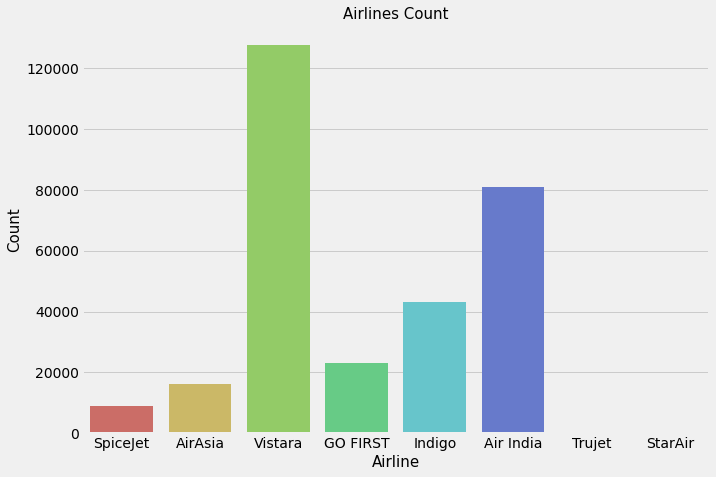

In [22]:
mp.figure(figsize=(10, 7))
sns.countplot(clean_created_df['airline'], palette='hls')
mp.title('Airlines Count',fontsize=15)
mp.xlabel('Airline',fontsize=15)
mp.ylabel('Count',fontsize=15)
mp.show()


# execute this one
plt.figure(figsize=(20, 10))
sns.barplot(x='airline',y='price',hue="class",data=df.sort_values("price")).set_title('Airline prices based on the class and company',fontsize=20)

<div style="font-family:cambria;">

* Vistara and AirIndia have the highest number of flights.
* Business flights are only available in two companies: Air India and Vistara.
* Trujet and StarAir have the lowest.

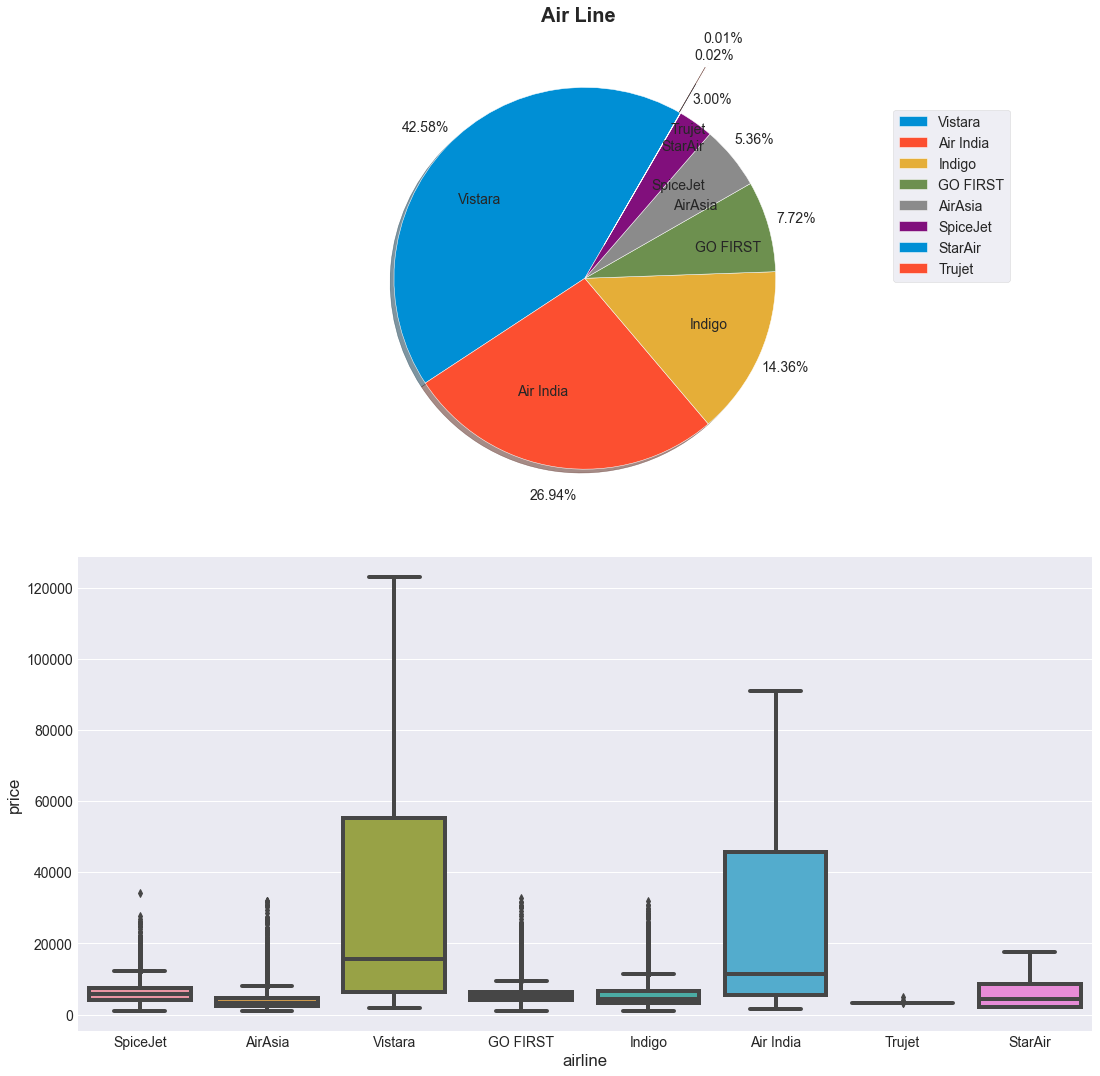

In [50]:
pie_box_plot('airline', 'Air Line', (0, 0, 0, 0, 0, 0, 0.2, 0.3), 60)

<div style="font-family:cambria;">

Vistara is the most used airline. Consists of 42.58% of all flights. It also has the highest price range.

Air India is the second most used flight. 26.94% of all flights. It is also the 2nd highest in prices.

Least used airlines are Trujet and StarAir at 0.01% and 0.02% respectively.

Trujet has the lowest price range.

[AV - Categorical Data Encoding](https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/)

[Medium - Too many Categories](https://annahava.medium.com/too-many-categories-how-to-deal-with-categorical-features-of-high-cardinality-d4563cfe62d6)

* Airline encoding  &rarr; Target Encoding ✅
* Combining codes and encoding ✅
* Location stats 
    * Unique locs ✅
    * Total arrivals and departures ✅
    * Mean price to each and from loc &rarr; groupby and min,avg, max price ✅
    * Flight distribution based on locs &rarr; grid of graphs for to and from vs filght company ✅ - add annotations over bars
* Departure time and arrival time encoding ✅
* Number of stops based on to and from locs (if feasible) ✅
* Number of stops based on airline type ✅ - Fill in the missing values and add annotations over bars
* Price distributions based on airlines, to and from locs, arrival and departure time encoding - ✅
* Time taken based on airlines, to and from locs -✅
* Monthly distributions of flights, based on airlines, to and from locs, arrival and departure time encoding -✅
* Yearly distributions of flights, based on airlines, to and from locs, arrival and departure time encoding (if feasible) - ✅
* Think what more can be done - ✅
* If cannot think of anything visit kaggle, download notebooks and learn more, implement more. - ✅
* Add analysis information for current level of analysis
* ML
* Refactor the code
* Add analysis information for remaning notebook
* Submission

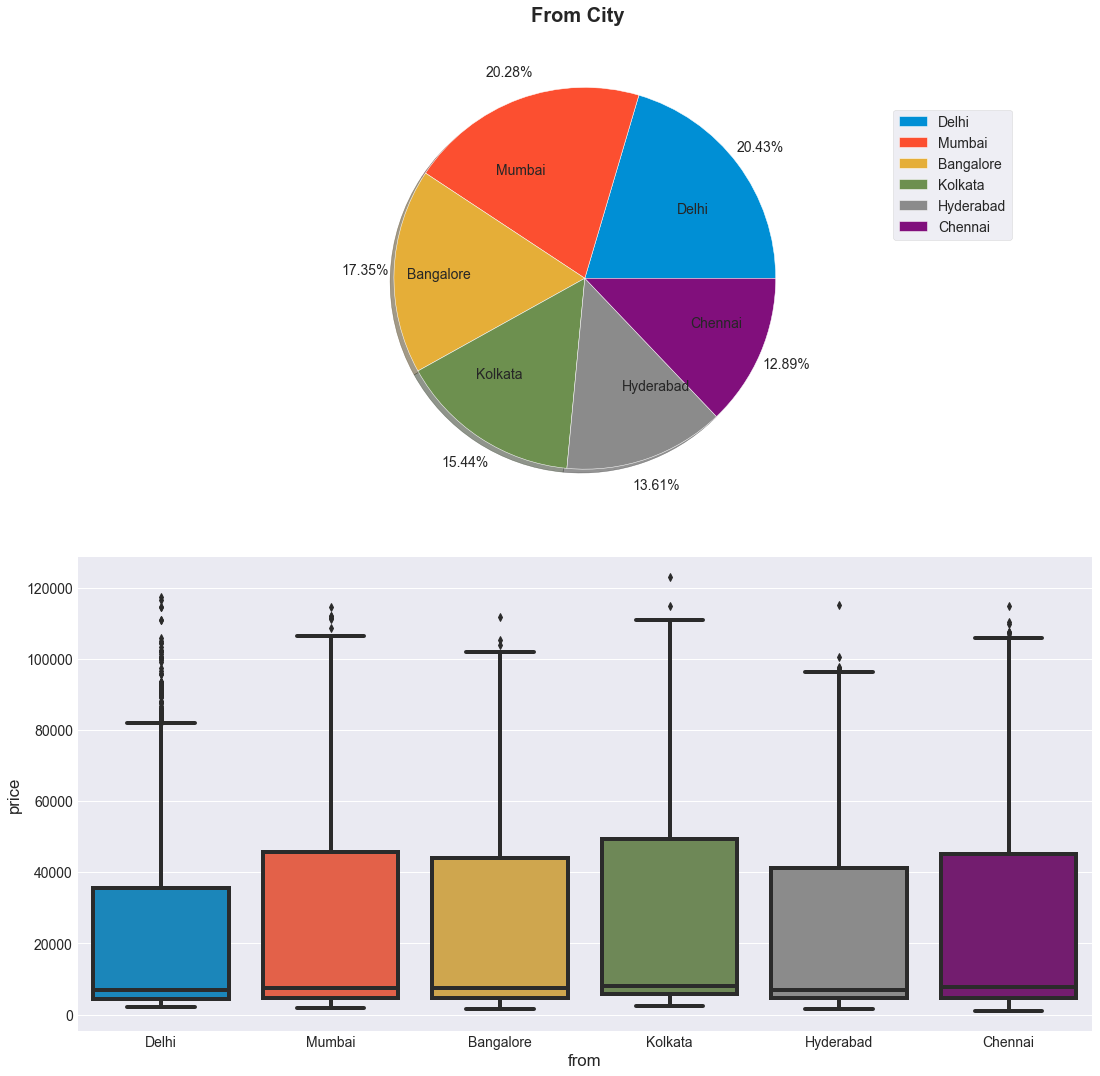

In [51]:
pie_box_plot('from', 'From City')

<div style="font-family:cambria;">

There isn't much difference in the price based on the source location

Flight price is slightly higher for the flights whose Source locations is **Kolkata**.

Flight price is almost similar for flights with Source locations as **Mumbai**, **Bangalore**, **Hyderabad** and **Chennai**.

Flight price is slightly lower for the flights with Source locations as **Delhi**.

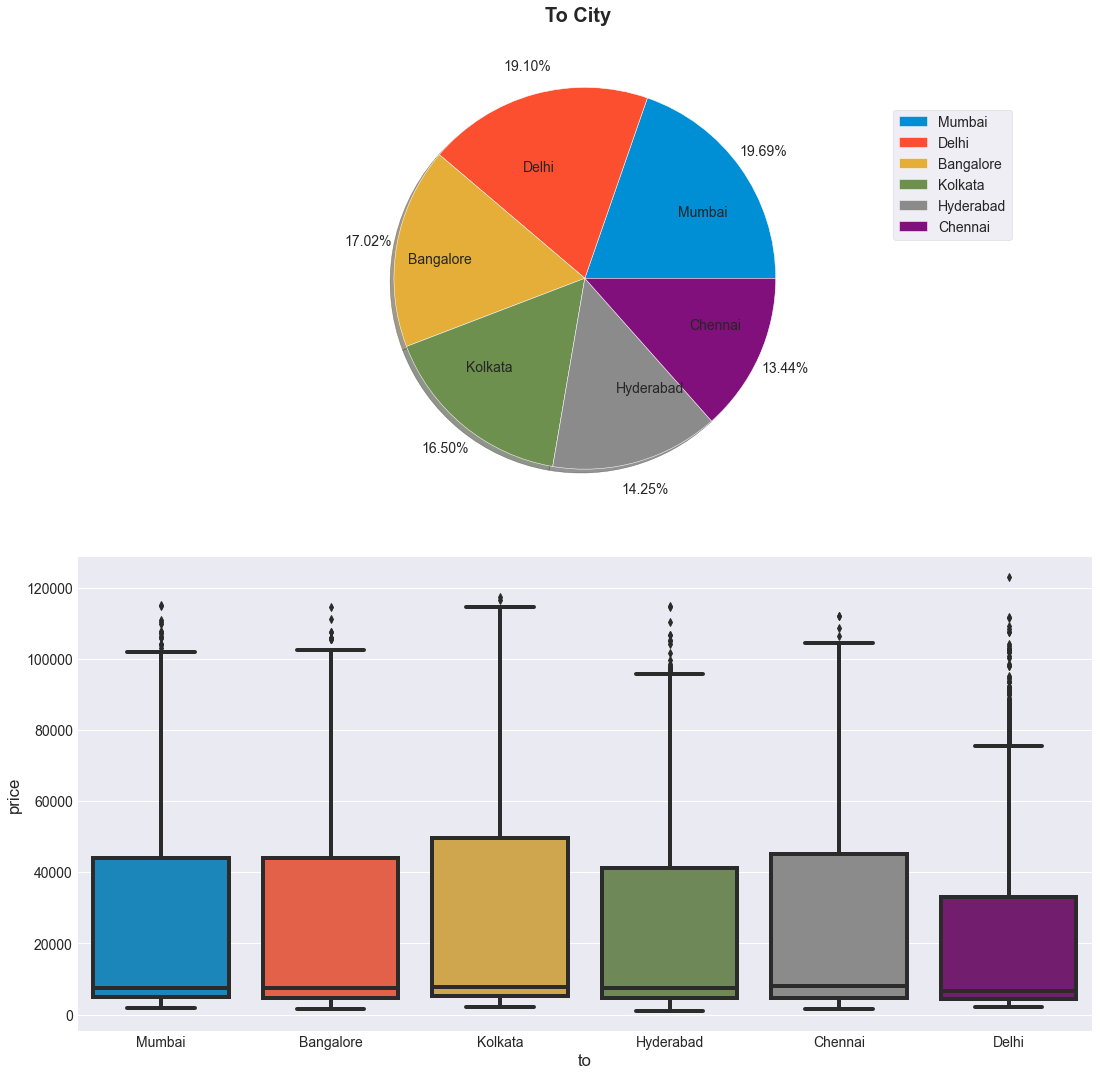

In [52]:
pie_box_plot('to', 'To City')

<div style="font-family:cambria;">

There isn't much difference in the price based on the destination location either.

Flight price is slightly higher for the flights with Destination City as **Kolkata** and **Chennai**.

Flight price is similar for flights Having Destination Cities as **Mumbai** and **Bangalore**.

Flight price is slightly lower for the flights Having Destination City as **Delhi**.

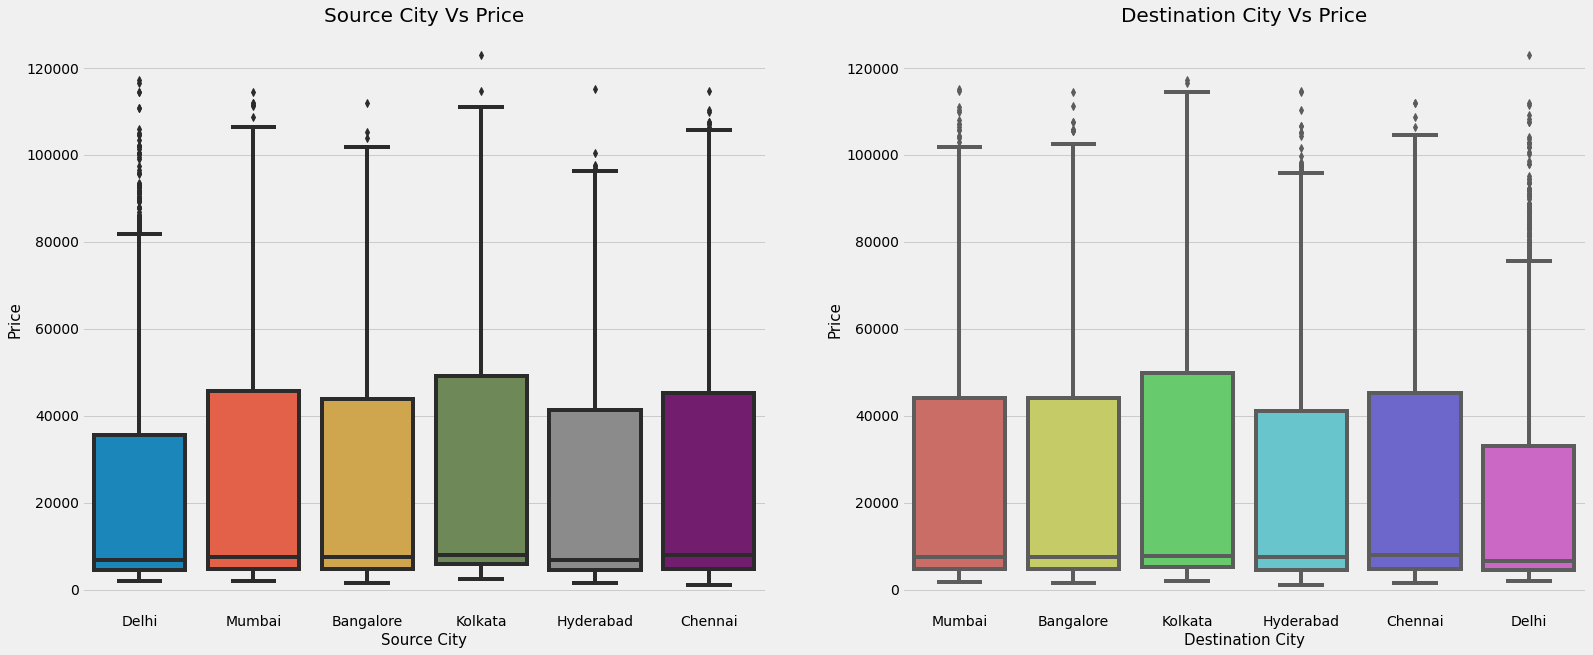

In [27]:
mp.figure(figsize = (24,10))
mp.subplot(1,2,1)
sns.boxplot(x = 'from', y = 'price', data = clean_created_df)
mp.title('Source City Vs Price', fontsize = 20)
mp.xlabel('Source City', fontsize = 15)
mp.ylabel('Price', fontsize = 15)

mp.subplot(1,2,2)
sns.boxplot(x = 'to', y = 'price', data = clean_created_df, palette = 'hls')
mp.title('Destination City Vs Price', fontsize = 20)
mp.xlabel('Destination City', fontsize = 15)
mp.ylabel('Price', fontsize = 15)
mp.show()

<div style="font-family:cambria;">

These graphs do not show any peculiar information, as there isn't much difference in price based on the source and destination locations.

In [21]:
clean_created_df.groupby(['from', 'to']).agg(
    Mean=('price', np.mean),
    Max = ('price', np.max),
    Min = ('price', np.min)).round(2)

# .mean()['price']

Mean     Max   Min
from      to                               
Bangalore Chennai    23321.85   90720  1603
          Delhi      17723.31  111883  2723
          Hyderabad  21152.05   83239  1694
          Kolkata    23498.23  105168  3026
          Mumbai     23127.23  103819  2150
Chennai   Bangalore  25081.85  107597  1443
          Delhi      18981.86  103683  2051
          Hyderabad  21591.35   92752  1105
          Kolkata    22669.93  104624  2359
          Mumbai     22765.85  114704  1830
Delhi     Bangalore  17880.22   85353  3090
          Chennai    19369.88  104466  1998
          Hyderabad  17347.29  114507  2022
          Kolkata    20566.41  117307  2480
          Mumbai     19354.41   95657  2281
Hyderabad Bangalore  21245.95   97767  1755
          Chennai    21848.07   95208  1543
          Delhi      17242.64   86203  2200
          Kolkata    20823.89   97381  2056
          Mumbai     20065.72  115211  2250
Kolkata   Bangalore  22744.81  105638  3465
          Chennai    23660.36   95183  2966
          Delhi      19422.35  123071  2994
          Hyderabad  21500.01  114705  2436
          Mumbai     22078.88  110936  3379
Mumbai    Bangalore  23147.87  114523  2074
          Chennai    22781.90  111964  1890
          Delhi      18725.32  111437  2336
          Hyderabad  20992.13   99677  2105
          Kolkata    22379.15  100909  2835

In [22]:
clean_ariline_group = clean_created_df.groupby(['from', 'to', 'airline']).count()['ch_code']

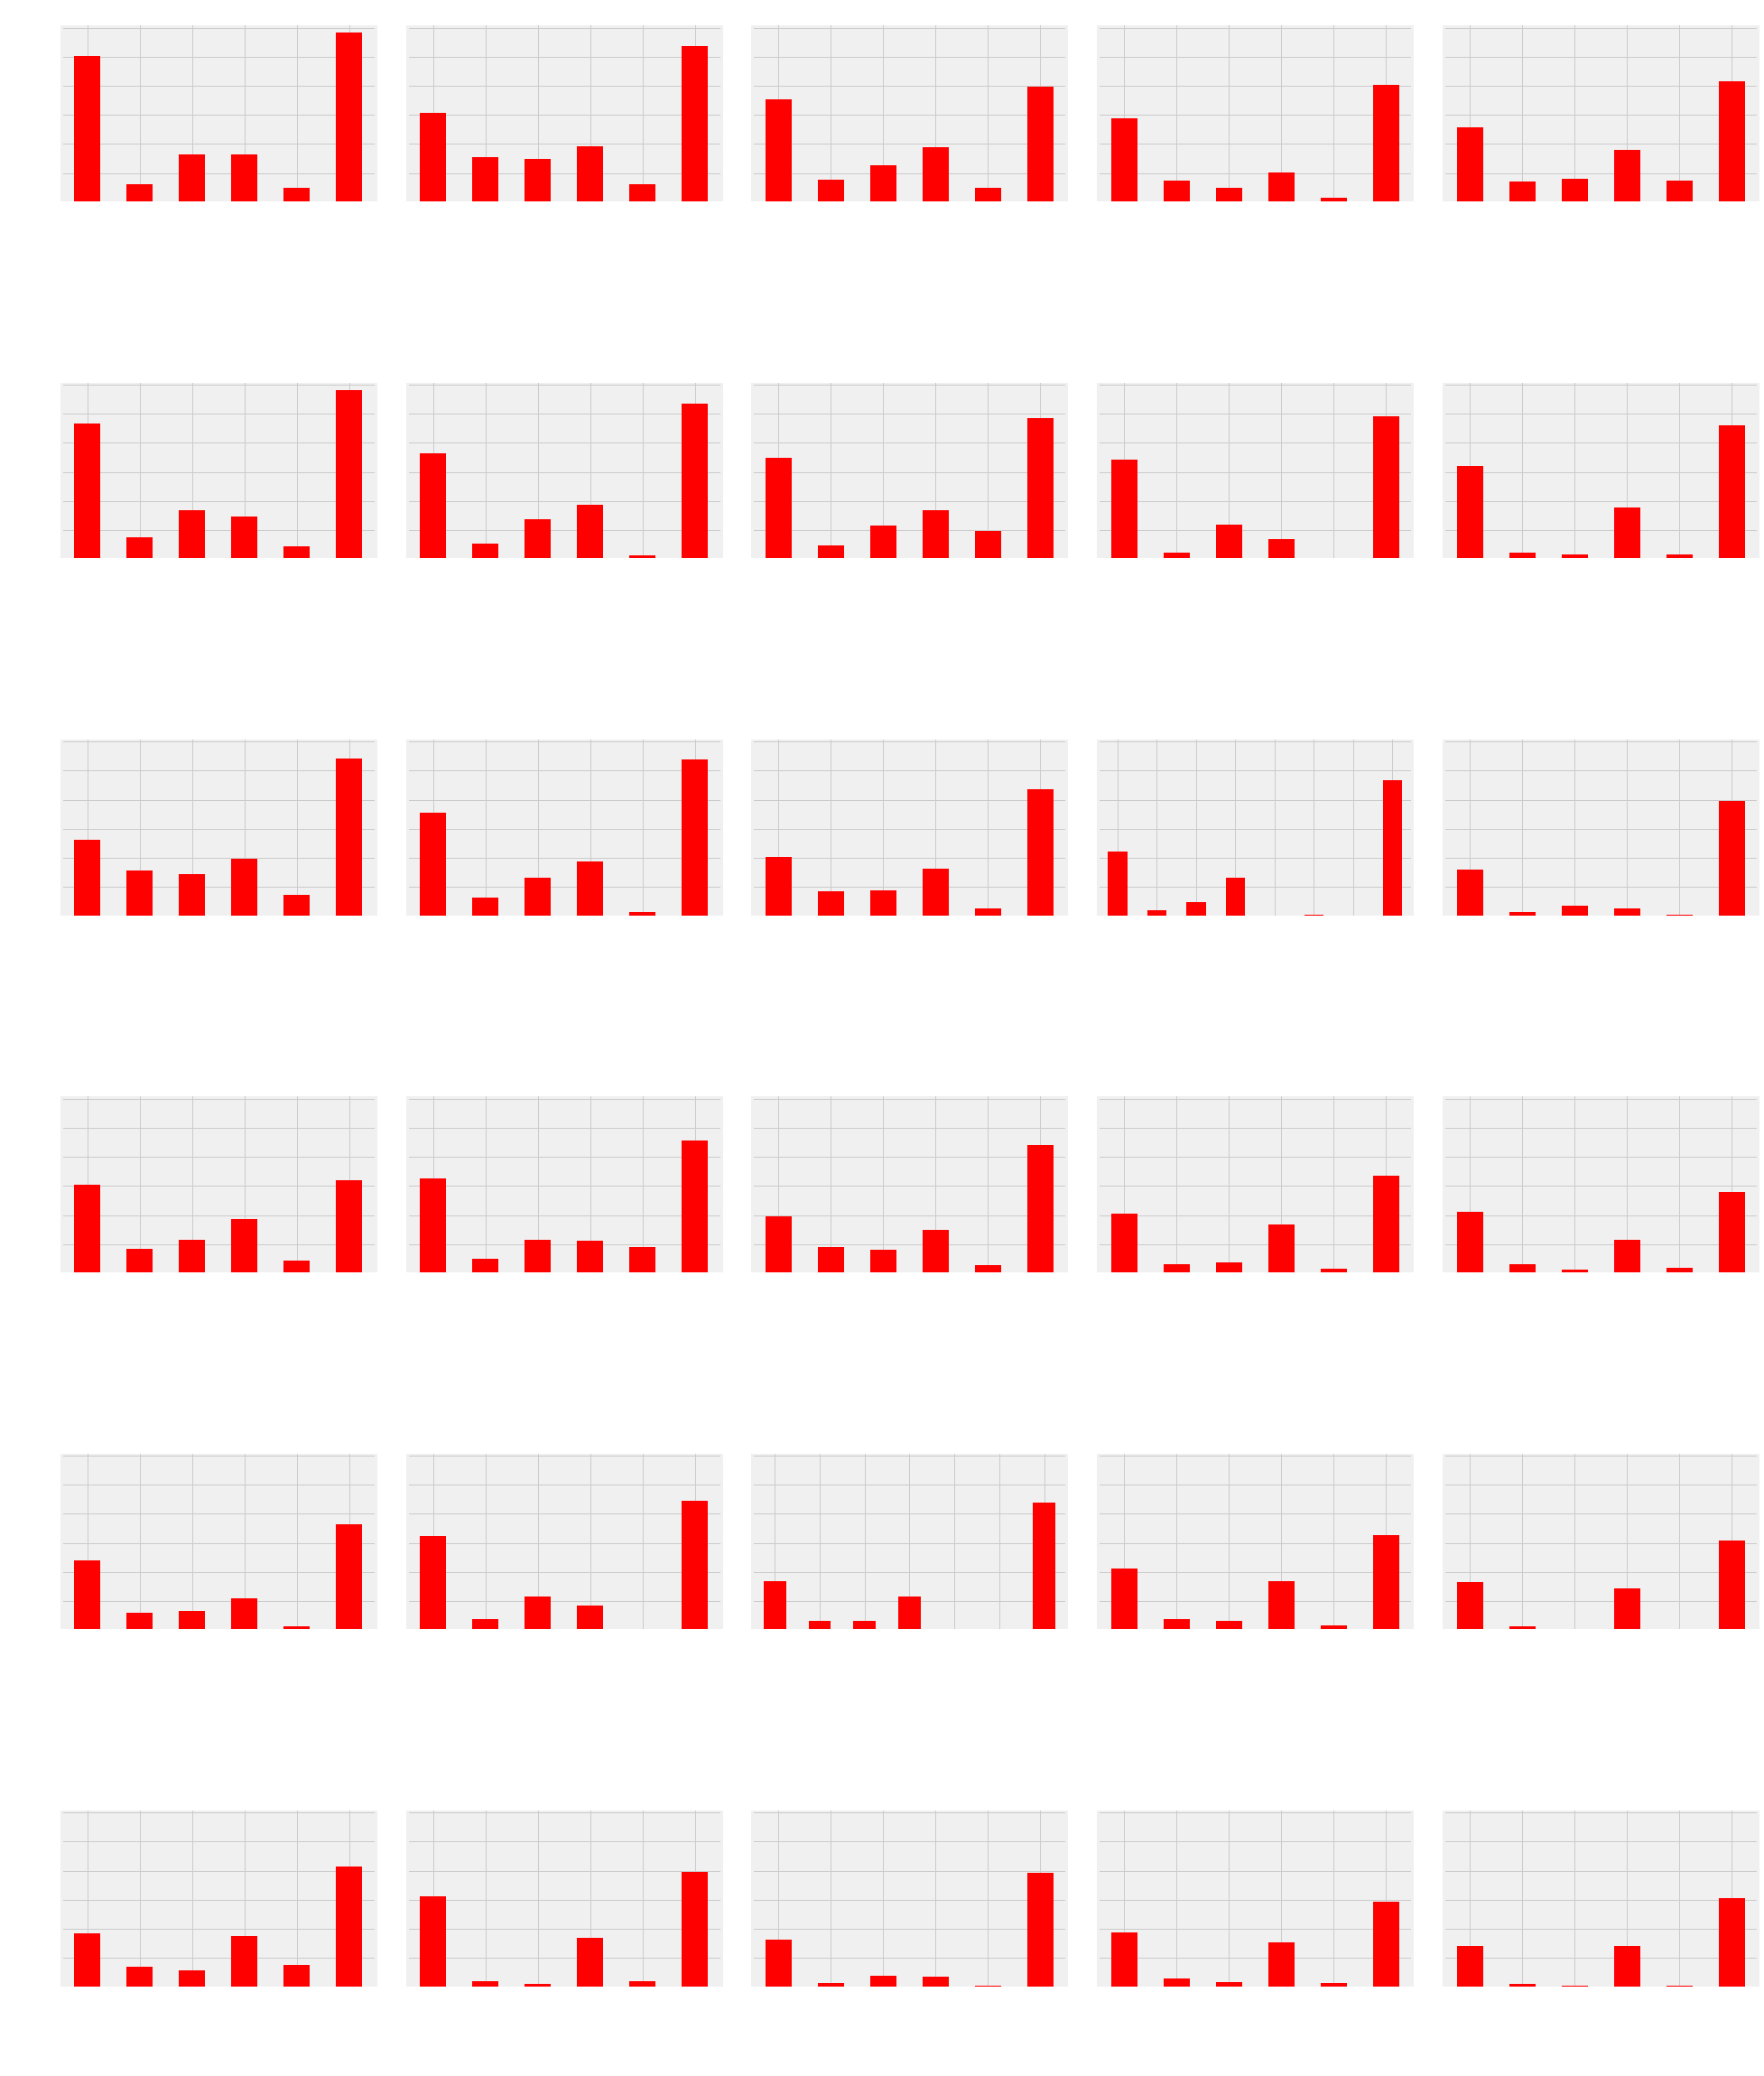

In [41]:
COLOR = 'white'
mp.rcParams['text.color'] = COLOR

font = {'size' : 14}
mp.rc('font', **font)

nrows, ncols = 6, 5
cities = clean_created_df['from'].unique()

fig, axes = mp.subplots(nrows=nrows, ncols=ncols, figsize=(30, 40), sharey=True)
a_row, a_col = 0, 0
mp.subplots_adjust(wspace=0.1, hspace=1)

for i in range(len(cities)):
    for j in range(len(cities)):
        if i == j:
            continue
        ax = axes[a_row][a_col]
        clean_ariline_group[cities[i]][cities[j]].plot(kind='bar', color='red', ax= ax)
        ax.set_title(cities[j], fontstyle='italic', fontsize=18)
        ax.set_ylabel(cities[i], fontstyle='italic', fontsize=18)
        ax.xaxis.label.set_color('white')
        ax.yaxis.label.set_color('white')

        ax.spines['bottom'].set_color('white')
        ax.spines['top'].set_color('white')
        ax.tick_params(axis='x', colors='white')
        ax.tick_params(axis='y', colors='white')
        
        a_col += 1
    a_row += 1
    a_col = 0



<div style="font-family:cambria;">

### Departure time and arrival time encoding

| Time Stamp Range   | Time Period   |
|:------------- |:-------------|
| Between 12 am to 2 am      | Late Night |
| Between 2 am to 4 am      | Ungodly Hour |
| Between 4 am to 7 am      | Early Morning |
| Between 7 am to 12 pm      | Morning |
| Between 12 am to 4 pm      | Afternoon |
| Between 4 pm to 7 pm      | Evening |
| Between 7 pm to 12 am      | Night |

In [17]:
clean_created_df['dep_time_time'] = pd.to_datetime(clean_created_df['dep_time'], format='%H:%M')
clean_created_df['arr_time_time'] = pd.to_datetime(clean_created_df['arr_time'], format='%H:%M')

clean_created_df["dep_time_enc"] = clean_created_df["dep_time_time"].dt.hour.apply(time_encoding)
clean_created_df["arr_time_enc"] = clean_created_df["arr_time_time"].dt.hour.apply(time_encoding)

clean_created_df.drop(columns=["dep_time_time", "arr_time_time"], inplace=True)

clean_created_df.head()

,Unnamed: 0,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class,flight,dep_time_enc,arr_time_enc,stops,time_taken_in_minutes,date_time,month,year,stops_str,time_taken_in_hrs
0,0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,5953,0,SG-8709,Evening,Night,0,130,2022-02-11,2,2022,0,2.17
1,1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,5953,0,SG-8157,Early Morning,Morning,0,140,2022-02-11,2,2022,0,2.33
2,2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,5956,0,I5-764,Ungodly Hour,Early Morning,0,130,2022-02-11,2,2022,0,2.17
3,3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,5955,0,UK-995,Morning,Morning,0,135,2022-02-11,2,2022,0,2.25
4,4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,5955,0,UK-963,Morning,Morning,0,140,2022-02-11,2,2022,0,2.33


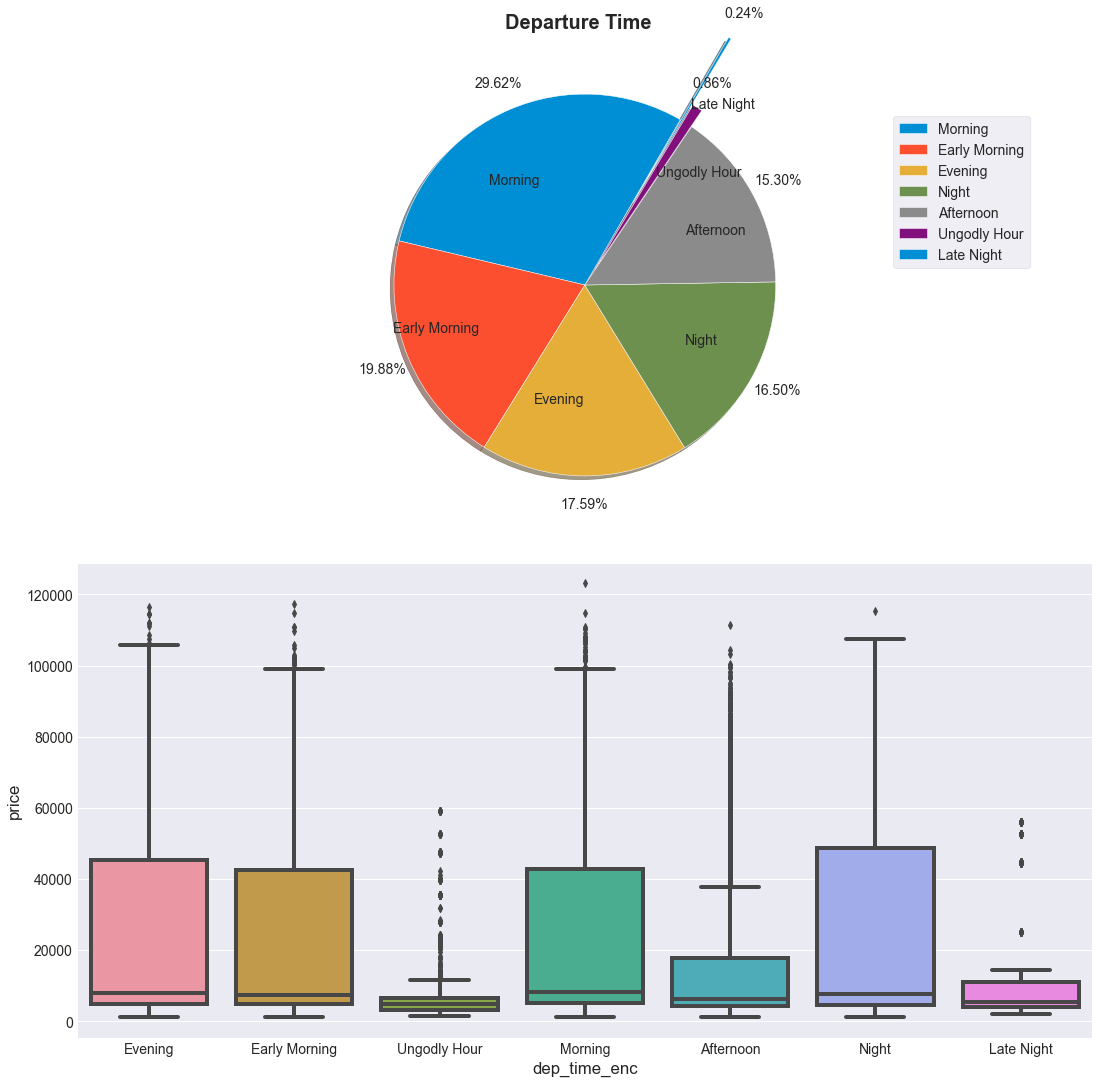

In [58]:
pie_box_plot('dep_time_enc', 'Departure Time',(0,0,0,0,0,0.1,0.5), 60)

<div style="font-family:cambria;">

**Late Night** and **UnGodly Hour** have the lowest prices for flights.

Followed by **Afternoon** time and rest all have almost similar prices.

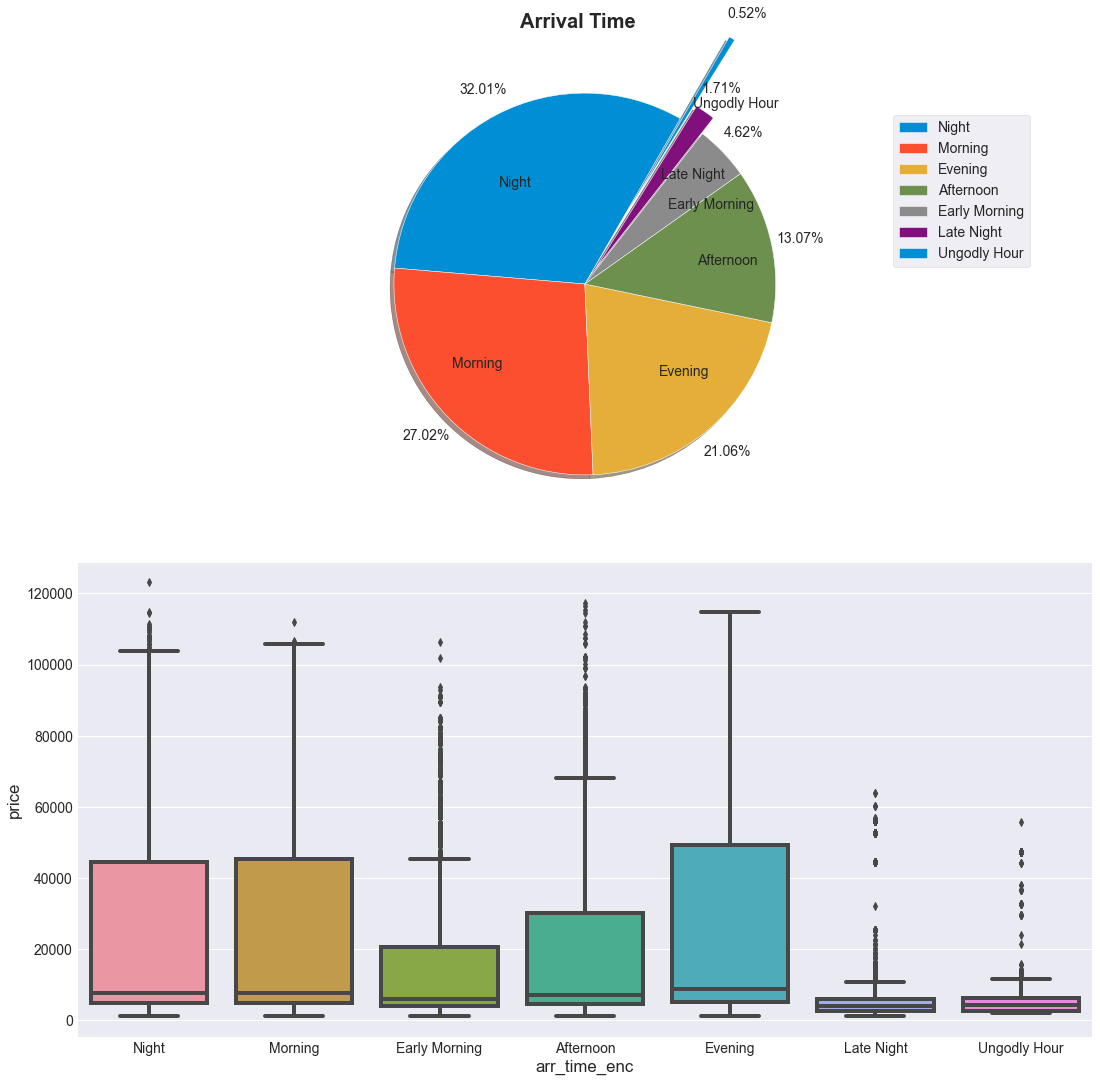

In [61]:
pie_box_plot('arr_time_enc', 'Arrival Time',(0,0,0,0,0,0.1,0.5), 60)

<div style="font-family:cambria;">

Almost same as previous observation but here the **Early Morning** period also shows less prices for flight.

Price is More for the flights when the Time period is at **Evening**

Price is almost equal for flights of time period is at **Morning** and **Night**

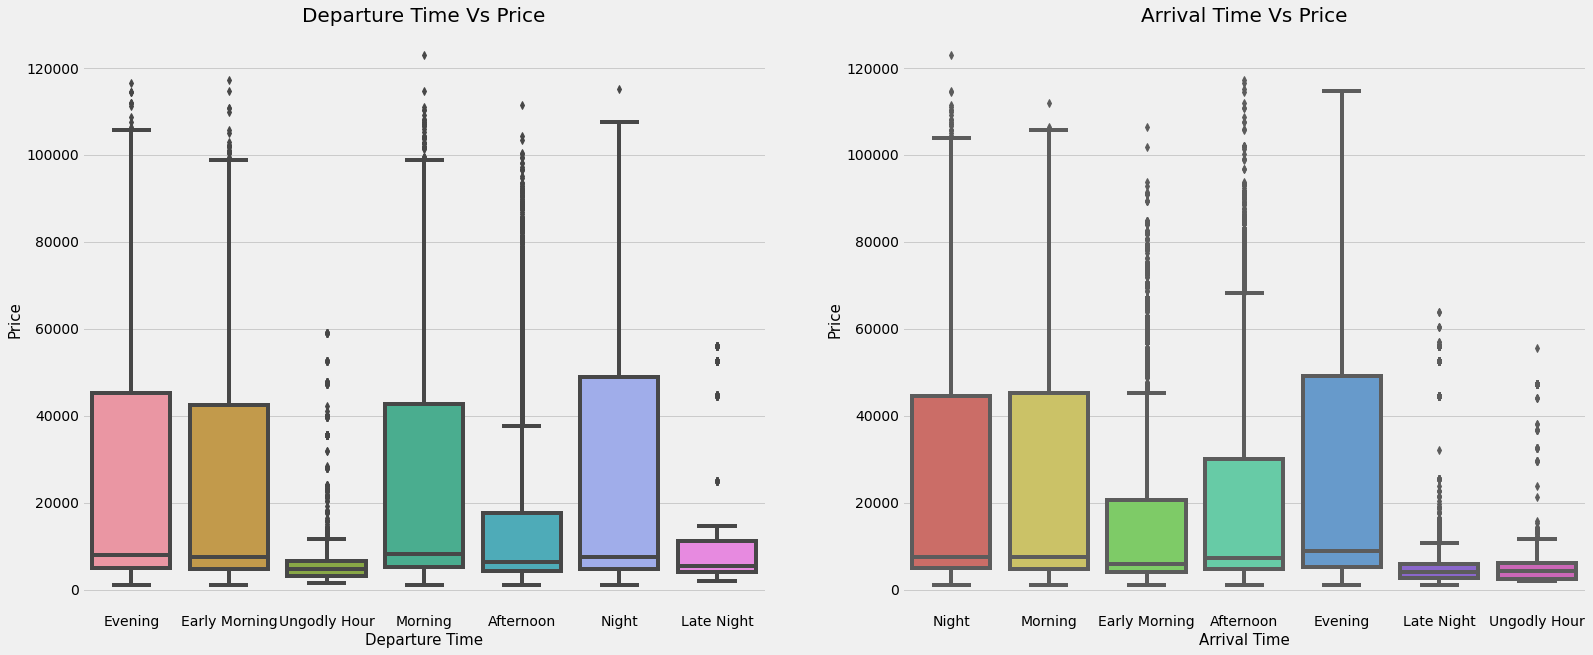

In [24]:
mp.figure(figsize = (24,10))
mp.subplot(1,2,1)
sns.boxplot(x = 'dep_time_enc', y = 'price',data = clean_created_df)
mp.title('Departure Time Vs Price',fontsize = 20)
mp.xlabel('Departure Time',fontsize = 15)
mp.ylabel('Price',fontsize = 15)

mp.subplot(1,2,2)
sns.boxplot(x = 'arr_time_enc', y = 'price', data = clean_created_df, palette = 'hls')
mp.title('Arrival Time Vs Price',fontsize = 20)
mp.xlabel('Arrival Time', fontsize = 15)
mp.ylabel('Price',fontsize = 15)
mp.show()

<div style="font-family:cambria;">

#### Analysis for Number of stops based on locations

In [4]:
clean_created_df["stops_str"] = clean_created_df["stop"].apply(get_stops)
clean_created_df.head()  # remove this head

,Unnamed: 0.1,Unnamed: 0,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,...,class,flight,dep_time_enc,arr_time_enc,stops,time_taken_in_minutes,date_time,month,year,stops_str
0,0,0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,...,0,SG-8709,Evening,Night,0,130,2022-02-11,2,2022,0
1,1,1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,...,0,SG-8157,Early Morning,Morning,0,140,2022-02-11,2,2022,0
2,2,2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,...,0,I5-764,Ungodly Hour,Early Morning,0,130,2022-02-11,2,2022,0
3,3,3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,...,0,UK-995,Morning,Morning,0,135,2022-02-11,2,2022,0
4,4,4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,...,0,UK-963,Morning,Morning,0,140,2022-02-11,2,2022,0


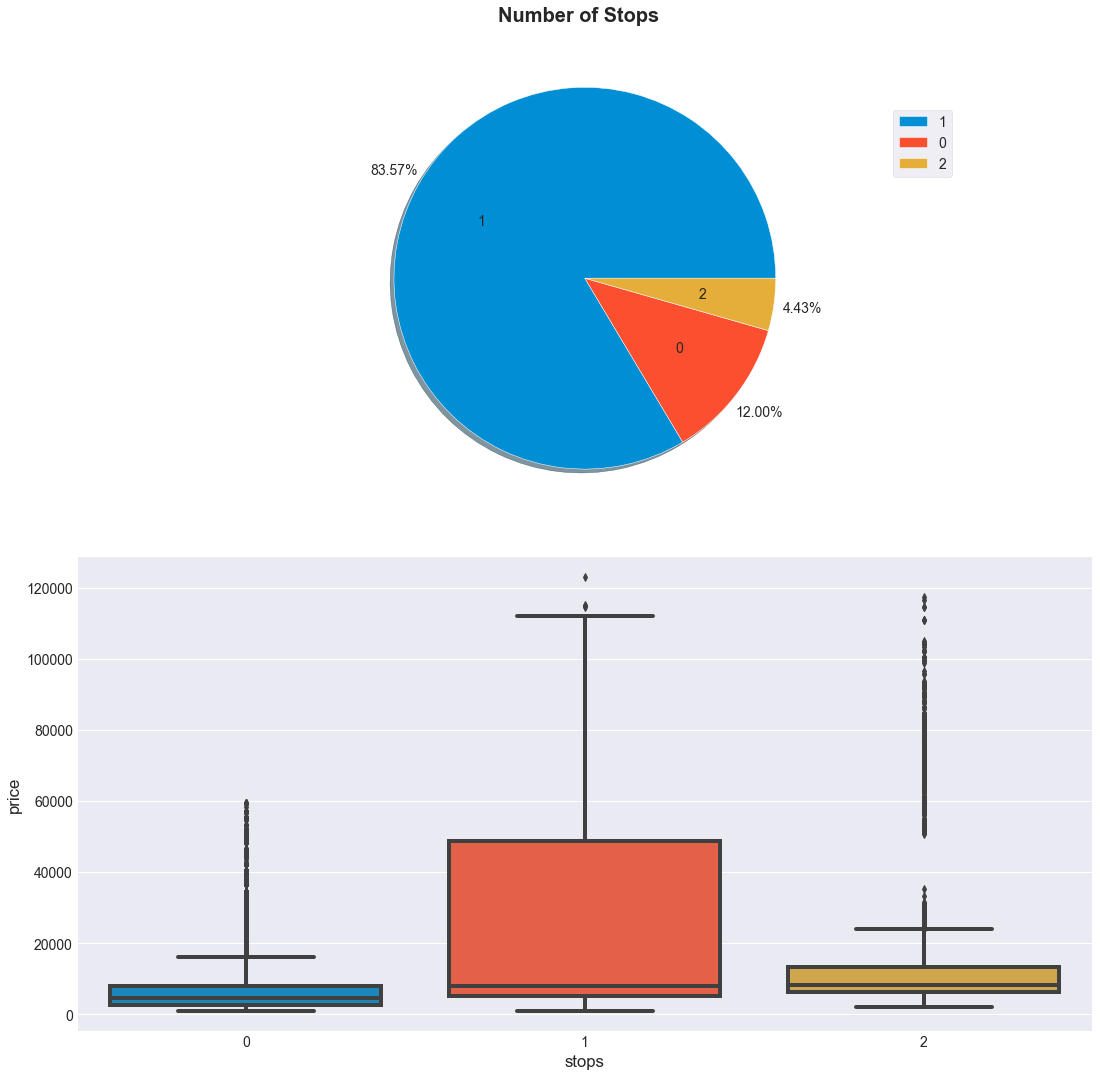

In [60]:
pie_box_plot('stops', 'Number of Stops')

<div style="font-family:cambria;">

Most of the flights have travelled with only **one stop**.

There isn't much difference between the count of flights with **0** or **1** stops.

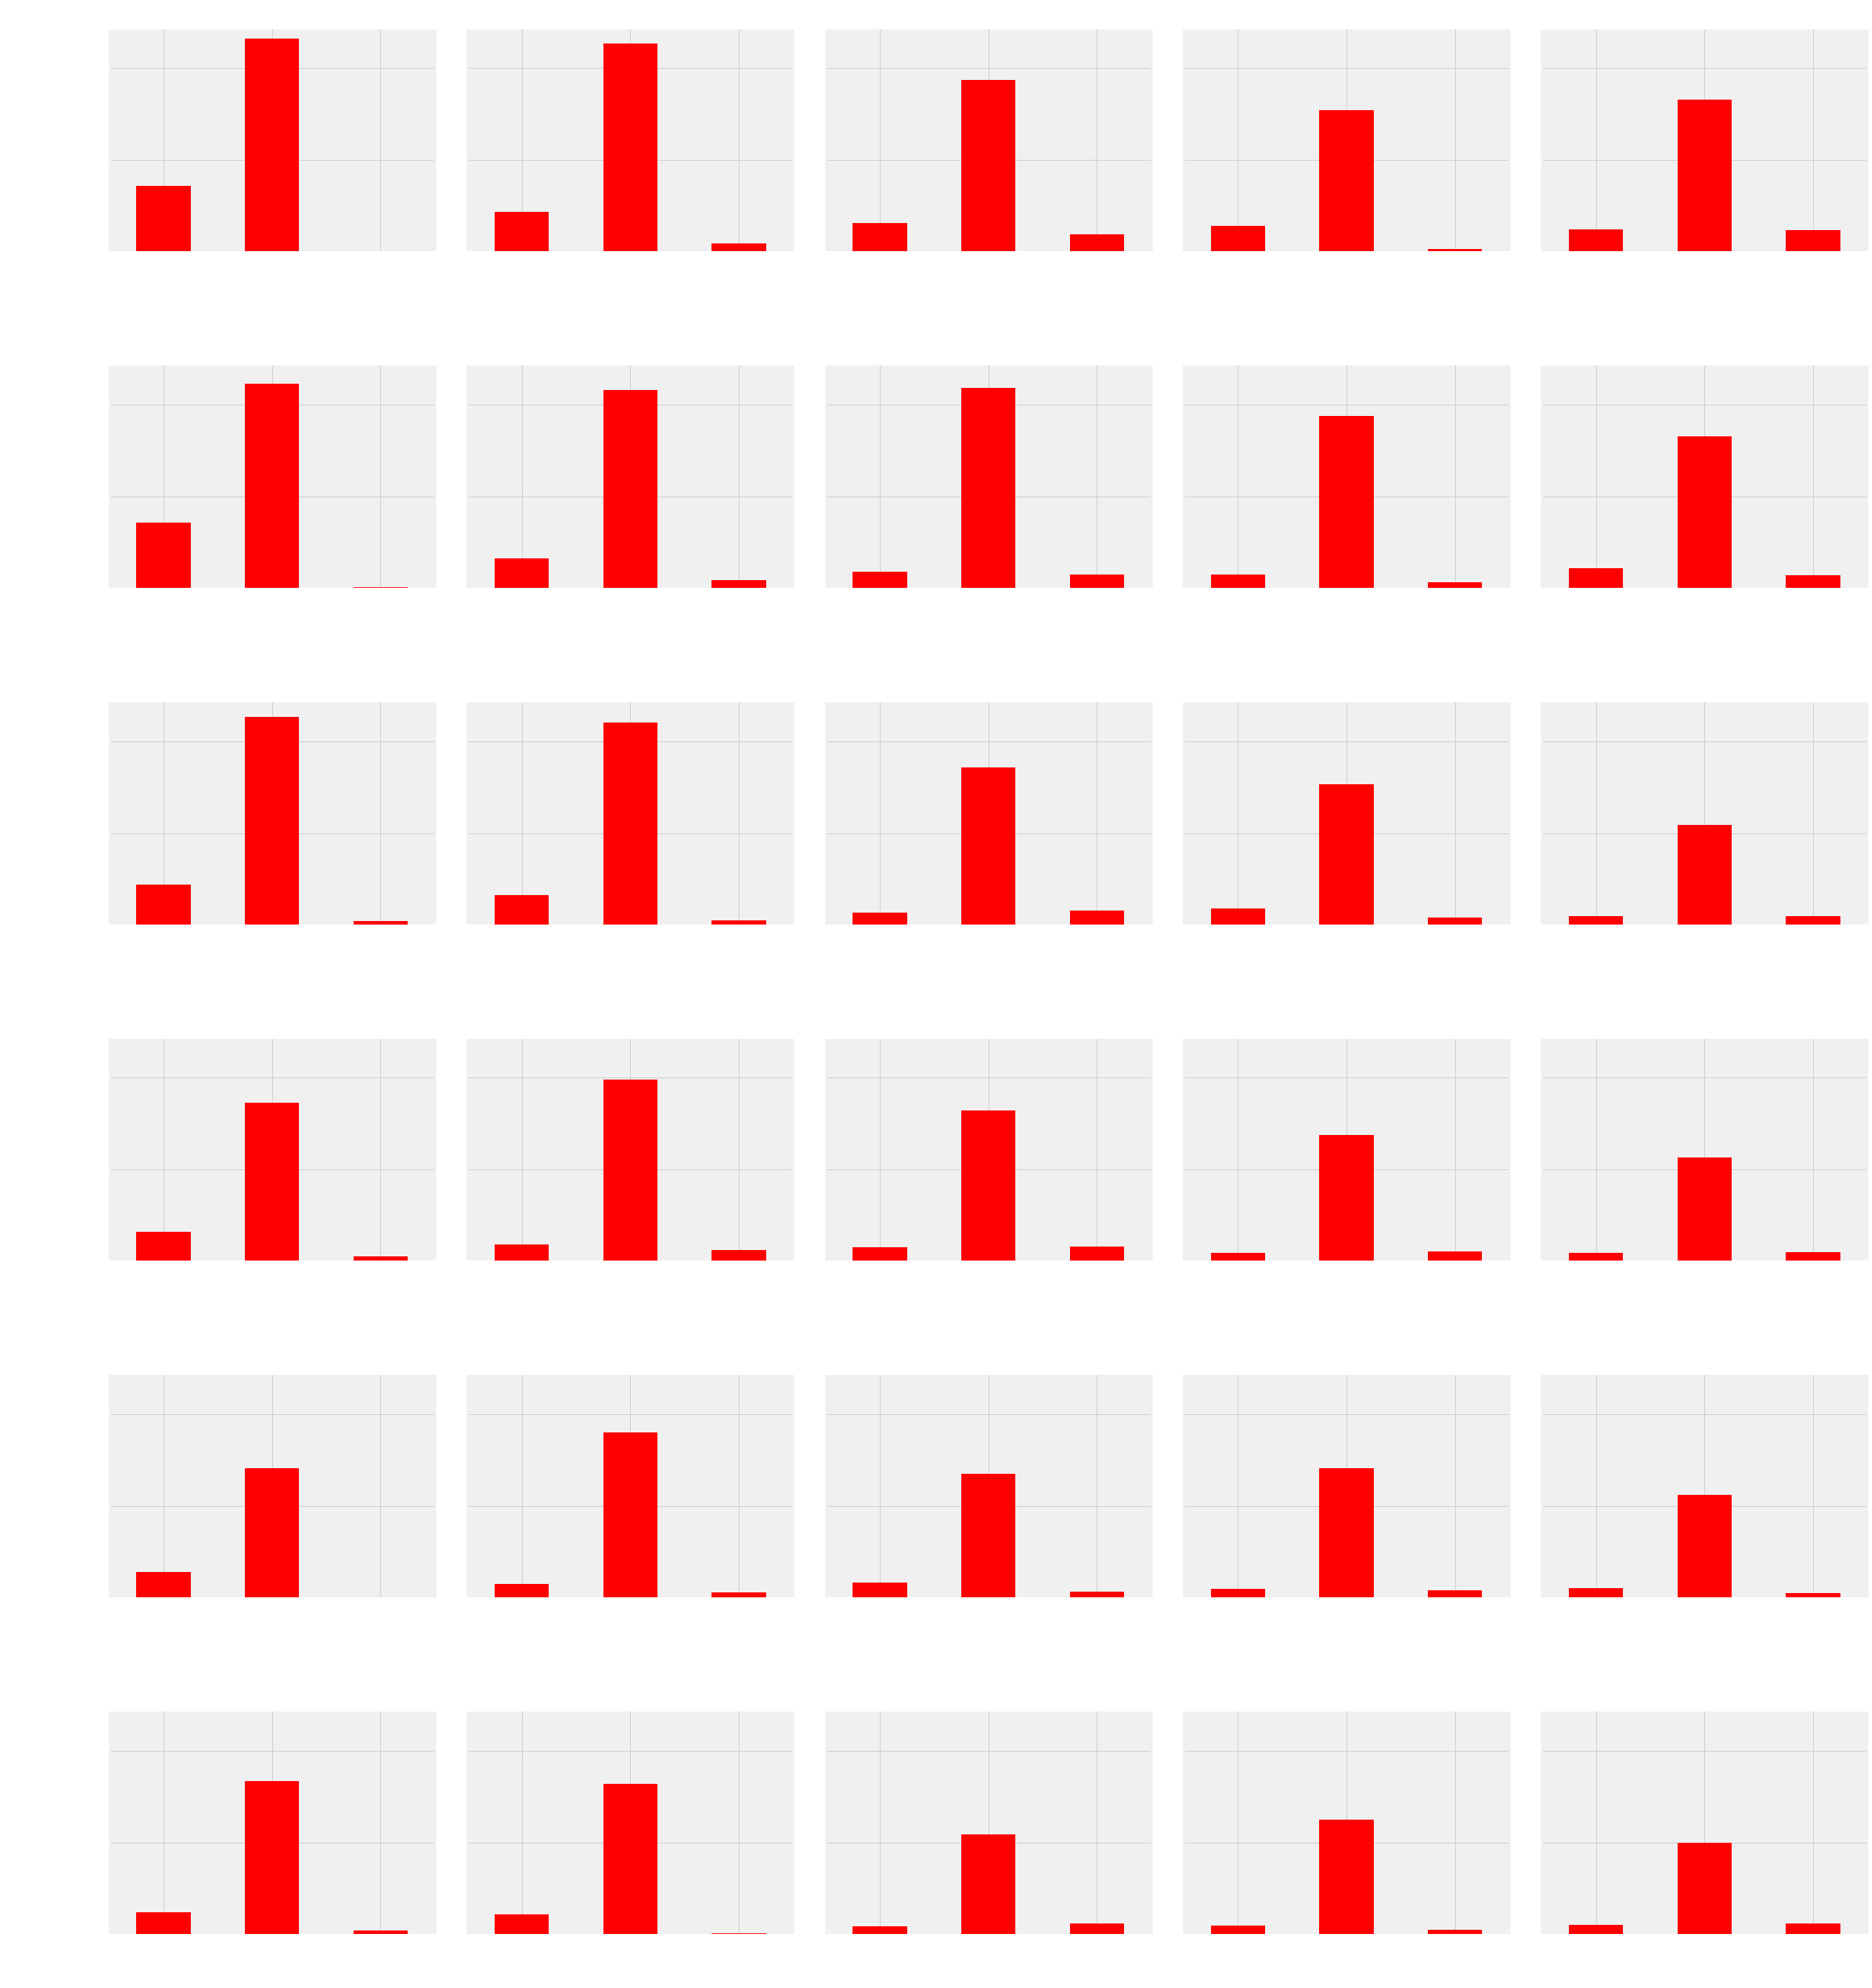

In [7]:
clean_stops_group = clean_created_df.groupby(['from', 'to', 'stops_str']).count()['ch_code']

COLOR = 'white'
mp.rcParams['text.color'] = COLOR

font = {'size' : 34}
mp.rc('font', **font)

nrows, ncols = 6, 5
cities = clean_created_df['from'].unique()

fig, axes = mp.subplots(nrows=nrows, ncols=ncols, figsize=(40, 50), sharey=True)
a_row, a_col = 0, 0
mp.subplots_adjust(wspace=0.1, hspace=0.5)

for i in range(len(cities)):
    for j in range(len(cities)):
        if i == j:
            continue

        ax = axes[a_row][a_col]
        clean_stops_group[cities[i]][cities[j]].plot(kind='bar', color='red', ax= ax)
        ax.set_title(cities[j], fontstyle='italic', fontsize=34)
        ax.set_ylabel(cities[i], fontstyle='italic', fontsize=34)
        ax.xaxis.label.set_color('white')
        ax.yaxis.label.set_color('white')

        ax.spines['bottom'].set_color('white')
        ax.spines['top'].set_color('white')
        ax.tick_params(axis='x', colors='white')
        ax.tick_params(axis='y', colors='white')
        
        a_col += 1

    a_row += 1
    a_col = 0


<div style="font-family:cambria;">

**One stop** seems to be very common number of stops for flight journeys.

Apart from that there aren't any more observations to be made here.

<div style="font-family:cambria;">

#### Stops based on airlines

Text(0.5, 1.0, 'Airline prices based on the number of stops for class business')

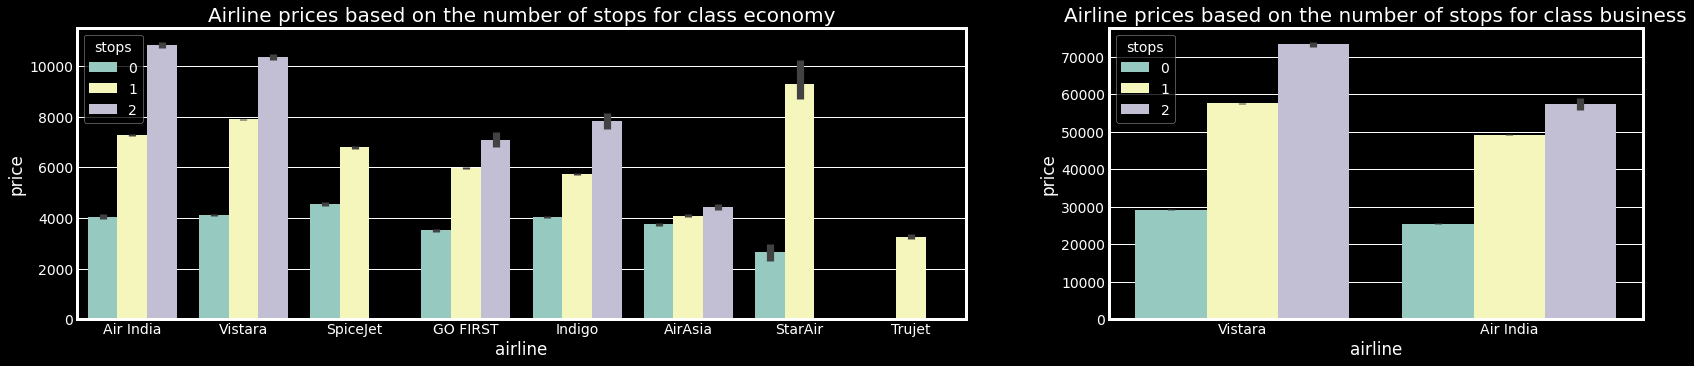

In [33]:
fig, axs = mp.subplots (1, 2, gridspec_kw={'width_ratios': [5, 3]}, figsize=(25, 5))
sns.barplot(y = "price", x = "airline", hue="stops", data = clean_created_df.loc[clean_created_df["class"]==0].sort_values("price", ascending = False), ax=axs[0])
axs[0].set_title("Airline prices based on the number of stops for class economy",fontsize=20)

sns.barplot(y = "price", x = "airline", hue="stops", data = clean_created_df.loc[clean_created_df["class"]==1].sort_values("price", ascending = False), ax=axs[1])
axs[1].set_title("Airline prices based on the number of stops for class business",fontsize=20)

<div style="font-family:cambria;">

The price for a 2 stops journey is the highest regardless of the class of the flight.

Followed by 1 stop and no stop.

Trujet has only made 1 stop journeys

It's clear that the more stops there are the more expensive the flight is except for AirAsia where the prices seems more constant. The behaviour and different analysis of AirAsia tend to show that it relates to a low cost company.

<div style="font-family:cambria;">

### Price distributions based on airlines, to and from locs, arrival and departure time encoding

[Solution by Janitha Navratna](https://stackoverflow.com/questions/60229375/solution-for-specificationerror-nested-renamer-is-not-supported-while-agg-alo)

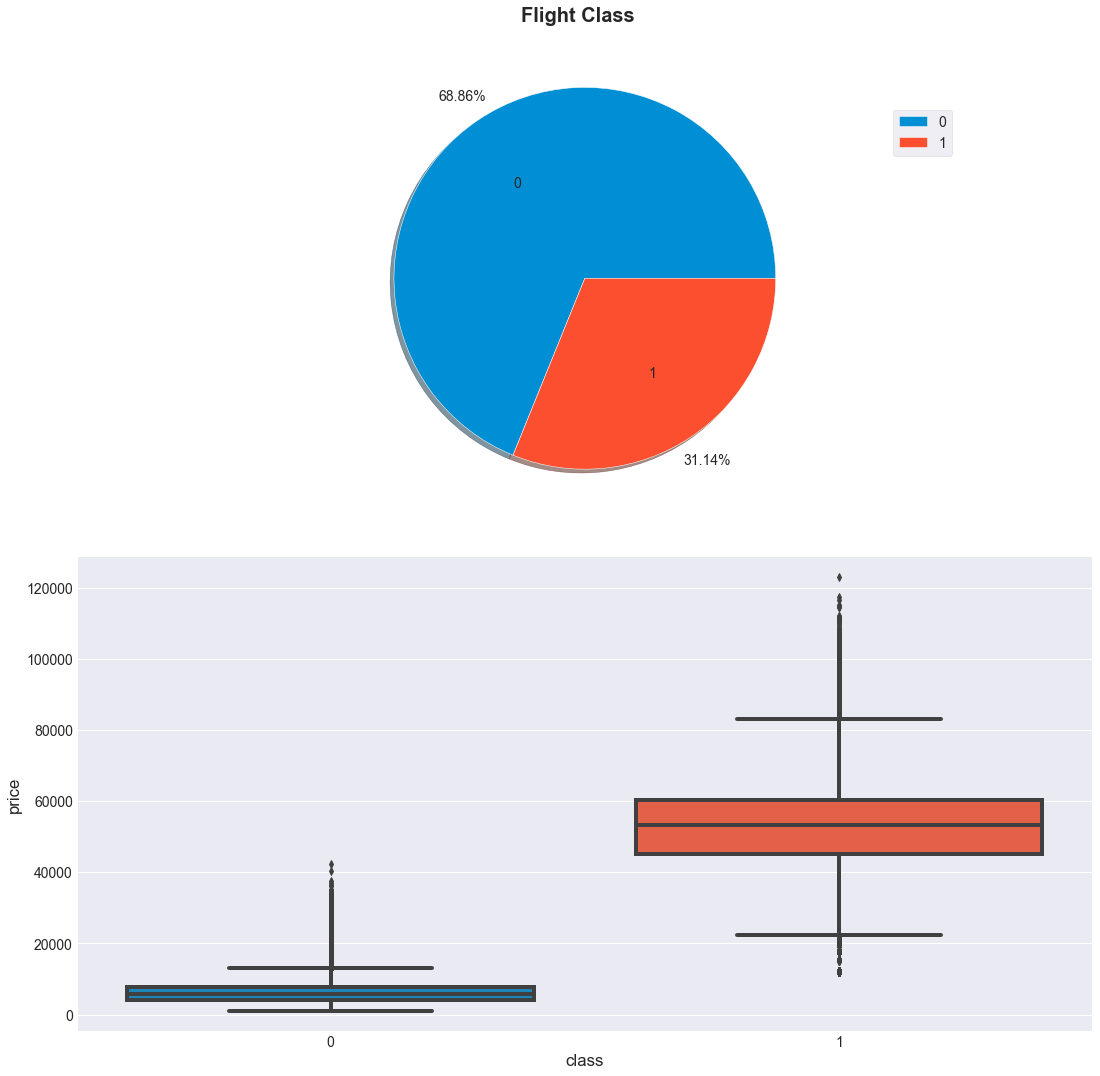

In [62]:
pie_box_plot('class', 'Flight Class')

<div style="font-family:cambria;">

There is a clear difference in the price of the **Economy** and **Business** Class.

Most of the flights are from the **Economy** class. **68.86 %** of the total flights.

In [24]:
clean_created_df.groupby(['airline', 'class'])['price'].agg([('Min Price', 'min'),
                                                  ('Avg Price', lambda x: np.round(np.mean(x))),
                                                  ('Median Price', np.median),
                                                  ('Max Price', 'max')])

Min Price  Avg Price  Median Price  Max Price
airline   class                                               
Air India 0           1526     7314.0        6082.0      42349
          1          12000    47131.0       49613.0      90970
AirAsia   0           1105     4091.0        3276.0      31917
GO FIRST  0           1105     5652.0        5336.0      32803
Indigo    0           1105     5324.0        4453.0      31952
SpiceJet  0           1106     6179.0        5654.0      34158
StarAir   0           2000     4933.0        4337.0      17482
Trujet    0           3124     3245.0        3196.0       4844
Vistara   0           1714     7807.0        6461.0      37646
          1          17604    55477.0       56588.0     123071

In [25]:
clean_created_df.groupby(['from', 'to', 'class'])['price'].agg([('Min Price', 'min'),
                                                  ('Avg Price', lambda x: np.round(np.mean(x))),
                                                  ('Median Price', np.median),
                                                  ('Max Price', 'max')])

Min Price  Avg Price  Median Price  Max Price
from      to        class                                               
Bangalore Chennai   0           1603     7106.0        6161.0      28174
                    1          12136    52437.0       49992.0      90720
          Delhi     0           2723     6125.0        4500.0      34158
                    1          32923    48144.0       50361.0     111883
          Hyderabad 0           1694     6356.0        5782.0      27610
                    1          12000    50396.0       56476.0      83239
          Kolkata   0           3026     7375.0        6271.0      29382
                    1          25000    58855.0       60508.0     105168
          Mumbai    0           2150     6381.0        6191.0      40354
                    1          20760    58025.0       56058.0     103819
Chennai   Bangalore 0           1443     7175.0        6161.0      36911
                    1          12000    53113.0       58970.0     107597
          Delhi     0           2051     6076.0        5100.0      34968
                    1          27792    52443.0       57920.0     103683
          Hyderabad 0           1105     5961.0        4714.0      26148
                    1          15000    51560.0       51345.0      92752
          Kolkata   0           2359     7547.0        5937.0      42349
                    1          20000    57079.0       55377.0     104624
          Mumbai    0           1830     6529.0        5037.0      37646
                    1          23424    56224.0       56273.0     114704
Delhi     Bangalore 0           3090     6176.0        4500.0      31917
                    1          32859    48576.0       49177.0      85353
          Chennai   0           1998     6102.0        4979.0      35145
                    1          27864    52032.0       52392.0     104466
          Hyderabad 0           2022     6031.0        5761.0      30760
                    1          23944    44457.0       46097.0     114507
          Kolkata   0           2480     7046.0        5955.0      32999
                    1          27976    56240.0       57405.0     117307
          Mumbai    0           2281     6060.0        5284.0      31260
                    1          22152    44364.0       42312.0      95657
Hyderabad Bangalore 0           1755     6209.0        5441.0      32751
                    1          12114    50358.0       56590.0      97767
          Chennai   0           1543     6050.0        4674.0      29128
                    1          15250    51132.0       51595.0      95208
          Delhi     0           2200     6072.0        5823.0      30211
                    1          24122    44251.0       47395.0      86203
          Kolkata   0           2056     6882.0        5960.0      33853
                    1          20000    53729.0       51819.0      97381
          Mumbai    0           2250     5966.0        4660.0      32803
                    1          17738    52184.0       52715.0     115211
Kolkata   Bangalore 0           3465     7472.0        6489.0      31899
                    1          25470    58681.0       60978.0     105638
          Chennai   0           2966     8012.0        6489.0      31479
                    1          20606    56503.0       55983.0      95183
          Delhi     0           2994     7161.0        6461.0      34944
                    1          28510    55047.0       53743.0     123071
          Hyderabad 0           2436     7489.0        6488.0      25494
                    1          20356    54732.0       52175.0     114705
          Mumbai    0           3379     7406.0        6067.0      31112
                    1          31838    57423.0       58111.0     110936
Mumbai    Bangalore 0           2074     6433.0        6319.0      34188
                    1          20684    57971.0       54608.0     114523
          Chennai   0           1890     6421.0        4732.0      33401
            

<div style="font-family:cambria;">

For almost all the cases the max price of economy is greater than the minimum price of business class.

In [8]:
clean_price_gb_dep_time = clean_created_df.groupby(['dep_time_enc', 'class'])['price'].agg([('Min Price', 'min'),
                                                  ('Avg Price', lambda x: np.round(np.mean(x))),
                                                  ('Median Price', np.median),
                                                  ('Max Price', 'max')])

# clean_price_gb_dep_time

In [40]:
print(clean_price_gb_dep_time.loc['Late Night'])
print(clean_price_gb_dep_time.loc['Ungodly Hour'])
print(clean_price_gb_dep_time.loc['Early Morning'])
print(clean_price_gb_dep_time.loc['Morning'])
print(clean_price_gb_dep_time.loc['Evening'])
print(clean_price_gb_dep_time.loc['Night'])

       Min Price  Avg Price  Median Price  Max Price
class                                               
0           2050     5277.0        4500.0      14526
1          25000    47472.0       52586.0      56058
       Min Price  Avg Price  Median Price  Max Price
class                                               
0           1543     5278.0        4500.0      31799
1          27976    42159.0       39859.0      59033
       Min Price  Avg Price  Median Price  Max Price
class                                               
0           1105     6624.0        5766.0      36911
1          12000    52334.0       53645.0     117307
       Min Price  Avg Price  Median Price  Max Price
class                                               
0           1105     7088.0        6067.0      37646
1          12114    52924.0       53164.0     123071
       Min Price  Avg Price  Median Price  Max Price
class                                               
0           1105     6508.0        5761.0     

<div style="font-family:cambria;">

* Starting from **Early Night** period the prices keep on increasing till **Evening** period.
* **Evening** and **Night** period have the highest max prices.

In [9]:
clean_price_gb_arr_time = clean_created_df.groupby(['arr_time_enc', 'class'])['price'].agg([('Min Price', 'min'),
                                                  ('Avg Price', lambda x: np.round(np.mean(x))),
                                                  ('Median Price', np.median),
                                                  ('Max Price', 'max')])
# clean_price_gb_arr_time

In [37]:
print(clean_price_gb_arr_time.loc['Late Night'])
print(clean_price_gb_arr_time.loc['Ungodly Hour'])
print(clean_price_gb_arr_time.loc['Early Morning'])
print(clean_price_gb_arr_time.loc['Morning'])
print(clean_price_gb_arr_time.loc['Evening'])
print(clean_price_gb_arr_time.loc['Night'])

       Min Price  Avg Price  Median Price  Max Price
class                                               
0           1105     4678.0        3957.0      23945
1          25470    48931.0       52522.0      63822
       Min Price  Avg Price  Median Price  Max Price
class                                               
0           2057     4582.0        4205.0      23945
1          29610    42452.0       47205.0      55655
       Min Price  Avg Price  Median Price  Max Price
class                                               
0           1105     5312.0        4896.0      35145
1          12000    47504.0       45257.0     106416
       Min Price  Avg Price  Median Price  Max Price
class                                               
0           1105     6410.0        5655.0      36333
1          12000    51536.0       52287.0     111964
       Min Price  Avg Price  Median Price  Max Price
class                                               
0           1105     7146.0        6109.0     

<div style="font-family:cambria;">

* Starting from **Early Night** period the prices keep on increasing till **Evening** period.
* **Evening** period has the highest max price.

<div style="font-family:cambria;">

Time taken based on airlines, to and from locs

In [6]:
print("Pearson")
print(clean_created_df["time_taken_in_minutes"].corr(clean_created_df[clean_created_df['class'] == 1]["price"], method="pearson"))
print(clean_created_df["time_taken_in_minutes"].corr(clean_created_df[clean_created_df['class'] == 0]["price"], method="pearson"))

print()
print("Spearman")
print(clean_created_df["time_taken_in_minutes"].corr(clean_created_df[clean_created_df['class'] == 1]["price"], method="spearman"))
print(clean_created_df["time_taken_in_minutes"].corr(clean_created_df[clean_created_df['class'] == 0]["price"], method="spearman"))

Pearson
0.24272886308634062
0.28862391775390067

Spearman
0.16478981987906013
0.3582301563612107


<div style="font-family:cambria;">

There doesn't seem to be much significant correlation between the **time taken in minutes** for the journey to the **price of the journey**.

In [7]:
clean_created_df.corr().style.background_gradient(cmap='coolwarm')

,Unnamed: 0,num_code,price,class,stops,time_taken_in_minutes
Unnamed: 0,1.000000,0.112364,-0.410561,-0.451927,0.068997,0.008193
num_code,0.112364,1.000000,-0.212865,-0.217168,-0.062173,-0.133754
price,-0.410561,-0.212865,1.000000,0.937868,0.119798,0.204472
class,-0.451927,-0.217168,0.937868,1.000000,0.001195,0.138956
stops,0.068997,-0.062173,0.119798,0.001195,1.000000,0.468137
time_taken_in_minutes,0.008193,-0.133754,0.204472,0.138956,0.468137,1.000000


<div style="font-family:cambria;">

Except for classes other attributes didn't seem to have a significant impact on the prices of the flights.

<div style="font-family:cambria;">

#### Monthly and Yearly distributions of flights, based on airlines, locations, arrival and departure time


In [10]:
clean_created_df['date_time'] = pd.to_datetime(clean_created_df['date'], format='%d-%m-%Y')
clean_created_df['month'] = pd.DatetimeIndex(clean_created_df['date_time']).month
# clean_created_df.head()

In [11]:
clean_created_df['year'] = pd.DatetimeIndex(clean_created_df['date_time']).year
clean_created_df['year'].value_counts()

2022    300261
Name: year, dtype: int64

<div style="font-family:cambria;">

There are only months of **February** and **March** and that too from the **year 2022** only and thus there wouldn't be much changes in the flight prices in the time span of **2 months**.

Thus **not analysing** this piece of information as of now.

In [16]:
clean_created_df['time_taken_in_hrs'].max()

49.83

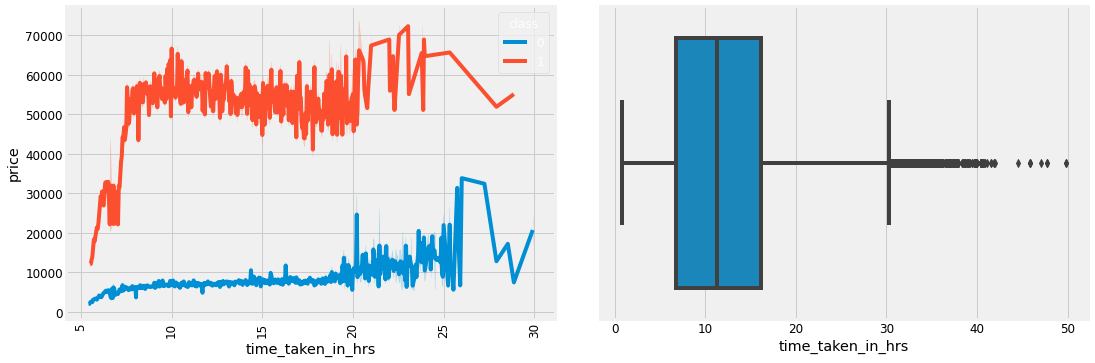

In [17]:
font = {'size' : 12}
mp.rc('font', **font)

fig, ax = mp.subplots(1, 2, figsize=(15, 5))
mp.tight_layout()
# mp.style.use('dark_background')
# Left ax
sns.lineplot(x='time_taken_in_hrs', y='price', data=clean_created_df, ax=ax[0], hue='class')
_ = ax[0].set_xticklabels(np.arange(0, 55, 5), rotation=90)

# Right AX
sns.boxplot(data=clean_created_df, x='time_taken_in_hrs', ax=ax[1])
mp.show()

<div style="font-family:cambria;">

**Convert this to hours and remove the minutes column.**

 - In <code>Business class</code>, from 1 to 5 hours, price growth sharply.
 - In <code>Business class</code> for durations more than 5, Price in a channel between 45000 to 60000.
 - In <code>Economy class</code> growth of price have a linear growth and for duration=47 have a sharp raise in pricess.

<div style="font-family:cambria;">


### Days Left

In [8]:
dd = pd.DataFrame(clean_created_df["date"].str.split("-",expand = True).to_numpy().astype(int),columns = ["day","month","year"])
dd1 = np.where(dd["month"] > 2, dd["day"] +18, np.where(dd["month"] == 2, dd["day"] -10, dd["day"]))


In [8]:
# clean_created_df_dum.dtypes

dd = pd.DataFrame(clean_created_df_dum["date_time"].str.split("-",expand = True).to_numpy().astype(int),columns = ["year","month","day"])
dd1 = np.where(dd["month"] > 2, dd["day"] +18, np.where(dd["month"] == 2, dd["day"] -10, dd["day"]))
clean_created_df_dum["days_left"] = dd1
clean_created_df_dum.head()

,dep_time,arr_time,price,class,stops,date_time,time_taken_in_hrs,airline_AirAsia,airline_GO FIRST,airline_Indigo,airline_SpiceJet,airline_StarAir,airline_Trujet,airline_Vistara,from_Chennai,from_Delhi,from_Hyderabad,from_Kolkata,from_Mumbai,to_Chennai,to_Delhi,to_Hyderabad,to_Kolkata,to_Mumbai,dep_time_enc_Early Morning,dep_time_enc_Evening,dep_time_enc_Late Night,dep_time_enc_Morning,dep_time_enc_Night,dep_time_enc_Ungodly Hour,arr_time_enc_Early Morning,arr_time_enc_Evening,arr_time_enc_Late Night,arr_time_enc_Morning,arr_time_enc_Night,arr_time_enc_Ungodly Hour,days_left
0,18:55,21:05,5953,0,0,2022-02-11,2.17,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1
1,06:20,08:40,5953,0,0,2022-02-11,2.33,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1
2,04:25,06:35,5956,0,0,2022-02-11,2.17,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1
3,10:20,12:35,5955,0,0,2022-02-11,2.25,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1
4,08:50,11:10,5955,0,0,2022-02-11,2.33,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1


In [9]:
# clean_created_df_dum.dtypes

dd = pd.DataFrame(clean_created_df_te["date_time"].str.split("-",expand = True).to_numpy().astype(int),columns = ["year","month","day"])
dd1 = np.where(dd["month"] > 2, dd["day"] +18, np.where(dd["month"] == 2, dd["day"] -10, dd["day"]))
clean_created_df_te["days_left"] = dd1
clean_created_df_te.head()

,dep_time,arr_time,price,class,stops,date_time,time_taken_in_hrs,airline_TE,from_TE,to_TE,dep_time_enc_TE,arr_time_enc_TE,days_left
0,18:55,21:05,5953,0,0,2022-02-11,2.17,6179.278881,18950.984758,21369.040197,22765.752928,21589.904011,1
1,06:20,08:40,5953,0,0,2022-02-11,2.33,6179.278881,18950.984758,21369.040197,20631.083878,22062.674679,1
2,04:25,06:35,5956,0,0,2022-02-11,2.17,4091.072742,18950.984758,21369.040197,6972.388803,16068.022589,1
3,10:20,12:35,5955,0,0,2022-02-11,2.25,30396.536302,18950.984758,21369.040197,21471.687757,22062.674679,1
4,08:50,11:10,5955,0,0,2022-02-11,2.33,30396.536302,18950.984758,21369.040197,21471.687757,22062.674679,1


<div style="font-family:cambria;">

<a id="ppng"></a>
## Preprocessing

For the preprocessing part I transformed the categorical variables into 2 separate types of encodings.
* Target Encoding - Since the categorical variables had more than 5 unique values and non of them had any order or ranking.
* Dummy Variable - Since Dummy Variables also looked like a good candidate for preprocessing.

I tried reading about various pros and cons of both of these methods but couldn't understand which one was better than the other.

So I implemented both of them to check which one will yield the best result.

Dummy Variables yielded the best results in terms of Adjusted R<sup>2</sup> Score.

In [17]:
cat_vars = ["airline", "from", "to", "dep_time_enc", "arr_time_enc"]

def target_encode(cat_vars):
    encode_list = []
    
    for col in cat_vars:
        # print(col)
        enc = TE(cols = col)
        enc_ftr = enc.fit_transform(clean_created_df[col], clean_created_df['price'])
        encode_list.append(enc_ftr)
    
    return pd.concat(encode_list, axis=1)


targ_df = target_encode(cat_vars)
targ_df.columns = ["airline_TE", "from_TE", "to_TE", "dep_time_enc_TE", "arr_time_enc_TE"]
clean_created_df_te = pd.concat([clean_created_df, targ_df], axis = 1)
clean_created_df_te.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class,flight,dep_time_enc,arr_time_enc,stops,time_taken_in_minutes,date_time,month,year,stops_str,time_taken_in_hrs,airline_TE,from_TE,to_TE,dep_time_enc_TE,arr_time_enc_TE
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,5953,0,SG-8709,Evening,Night,0,130,2022-02-11,2,2022,0,2.17,6179.278881,18950.984758,21369.040197,22765.752928,21589.904011
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,5953,0,SG-8157,Early Morning,Morning,0,140,2022-02-11,2,2022,0,2.33,6179.278881,18950.984758,21369.040197,20631.083878,22062.674679
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,5956,0,I5-764,Ungodly Hour,Early Morning,0,130,2022-02-11,2,2022,0,2.17,4091.072742,18950.984758,21369.040197,6972.388803,16068.022589
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,5955,0,UK-995,Morning,Morning,0,135,2022-02-11,2,2022,0,2.25,30396.536302,18950.984758,21369.040197,21471.687757,22062.674679
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,5955,0,UK-963,Morning,Morning,0,140,2022-02-11,2,2022,0,2.33,30396.536302,18950.984758,21369.040197,21471.687757,22062.674679


In [16]:
target_encode(cat_vars)

,airline,from,to,dep_time_enc,arr_time_enc
0,6179.278881,18950.984758,21369.040197,22765.752928,21589.904011
1,6179.278881,18950.984758,21369.040197,20631.083878,22062.674679
2,4091.072742,18950.984758,21369.040197,6972.388803,16068.022589
3,30396.536302,18950.984758,21369.040197,21471.687757,22062.674679
4,30396.536302,18950.984758,21369.040197,21471.687757,22062.674679
...,...,...,...,...,...
300256,30396.536302,21995.339871,20410.105152,21471.687757,23024.439329
300257,30396.536302,21995.339871,20410.105152,21471.687757,21589.904011
300258,30396.536302,21995.339871,20410.105152,20631.083878,21589.904011
300259,30396.536302,21995.339871,20410.105152,20631.083878,23024.439329


In [22]:
write_csv("My_Clean_Dataset_TE.csv", clean_created_df_te)

[Why Dummy Variables over interger replacement??](https://stackoverflow.com/questions/73912332/should-i-change-my-object-variables-to-integers-or-create-dummy-variables)

[Integer Replacement Pros and Cons](https://stats.stackexchange.com/questions/581430/why-use-dummies-and-not-different-integers-for-categorical-data)

[Dummy v/s Numeric - Quora](https://www.quora.com/About-converting-a-categorical-variable-into-a-numeric-variable-When-is-it-better-to-use-dummy-variables-instead-of-a-single-numerical-variable)

[Which ML Algorithms are better for numerical and categorical data](https://www.quora.com/Which-machine-learning-algorithms-are-appropriate-for-numerical-categorical-or-both-values/answer/Shehroz-Khan-2)

In [6]:
# dummies_variables = ["airline","from","to","dep_time_enc","arr_time_enc"]
dummies = pd.get_dummies(clean_created_df[cat_vars], drop_first= True)

clean_created_df_dum = pd.concat([clean_created_df, dummies], axis = 1)
clean_created_df_dum.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class,flight,dep_time_enc,arr_time_enc,stops,time_taken_in_minutes,date_time,month,year,stops_str,time_taken_in_hrs,airline_AirAsia,airline_GO FIRST,airline_Indigo,airline_SpiceJet,airline_StarAir,airline_Trujet,airline_Vistara,from_Chennai,from_Delhi,from_Hyderabad,from_Kolkata,from_Mumbai,to_Chennai,to_Delhi,to_Hyderabad,to_Kolkata,to_Mumbai,dep_time_enc_Early Morning,dep_time_enc_Evening,dep_time_enc_Late Night,dep_time_enc_Morning,dep_time_enc_Night,dep_time_enc_Ungodly Hour,arr_time_enc_Early Morning,arr_time_enc_Evening,arr_time_enc_Late Night,arr_time_enc_Morning,arr_time_enc_Night,arr_time_enc_Ungodly Hour
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,5953,0,SG-8709,Evening,Night,0,130,2022-02-11,2,2022,0,2.17,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,5953,0,SG-8157,Early Morning,Morning,0,140,2022-02-11,2,2022,0,2.33,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,5956,0,I5-764,Ungodly Hour,Early Morning,0,130,2022-02-11,2,2022,0,2.17,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,5955,0,UK-995,Morning,Morning,0,135,2022-02-11,2,2022,0,2.25,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,5955,0,UK-963,Morning,Morning,0,140,2022-02-11,2,2022,0,2.33,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0


In [21]:
write_csv("My_Clean_Dataset_DUM.csv", clean_created_df_dum)

In [11]:
to_remove = ['date', 'airline', 'ch_code', 'num_code', 'from',
       'time_taken', 'stop', 'to', 'flight',
       'dep_time_enc', 'arr_time_enc', 'time_taken_in_minutes',
        'month', 'year', 'stops_str']

to_keep = ['price', 'class', 'stops', 'date_time', 'time_taken_in_hrs']


to_decide = ['dep_time', 'arr_time']

enc = ["airline", "from", "to", "dep_time_enc", "arr_time_enc"]

In [19]:
clean_created_df_te.drop(columns=to_remove, inplace=True)
clean_created_df_te.head()

,dep_time,arr_time,price,class,stops,date_time,time_taken_in_hrs,airline_TE,from_TE,to_TE,dep_time_enc_TE,arr_time_enc_TE
0,18:55,21:05,5953,0,0,2022-02-11,2.17,6179.278881,18950.984758,21369.040197,22765.752928,21589.904011
1,06:20,08:40,5953,0,0,2022-02-11,2.33,6179.278881,18950.984758,21369.040197,20631.083878,22062.674679
2,04:25,06:35,5956,0,0,2022-02-11,2.17,4091.072742,18950.984758,21369.040197,6972.388803,16068.022589
3,10:20,12:35,5955,0,0,2022-02-11,2.25,30396.536302,18950.984758,21369.040197,21471.687757,22062.674679
4,08:50,11:10,5955,0,0,2022-02-11,2.33,30396.536302,18950.984758,21369.040197,21471.687757,22062.674679


In [20]:
clean_created_df_dum.drop(columns=to_remove, inplace=True)
clean_created_df_dum.head()

,dep_time,arr_time,price,class,stops,date_time,time_taken_in_hrs,airline_AirAsia,airline_GO FIRST,airline_Indigo,airline_SpiceJet,airline_StarAir,airline_Trujet,airline_Vistara,from_Chennai,from_Delhi,from_Hyderabad,from_Kolkata,from_Mumbai,to_Chennai,to_Delhi,to_Hyderabad,to_Kolkata,to_Mumbai,dep_time_enc_Early Morning,dep_time_enc_Evening,dep_time_enc_Late Night,dep_time_enc_Morning,dep_time_enc_Night,dep_time_enc_Ungodly Hour,arr_time_enc_Early Morning,arr_time_enc_Evening,arr_time_enc_Late Night,arr_time_enc_Morning,arr_time_enc_Night,arr_time_enc_Ungodly Hour
0,18:55,21:05,5953,0,0,2022-02-11,2.17,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0
1,06:20,08:40,5953,0,0,2022-02-11,2.33,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0
2,04:25,06:35,5956,0,0,2022-02-11,2.17,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0
3,10:20,12:35,5955,0,0,2022-02-11,2.25,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
4,08:50,11:10,5955,0,0,2022-02-11,2.33,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0


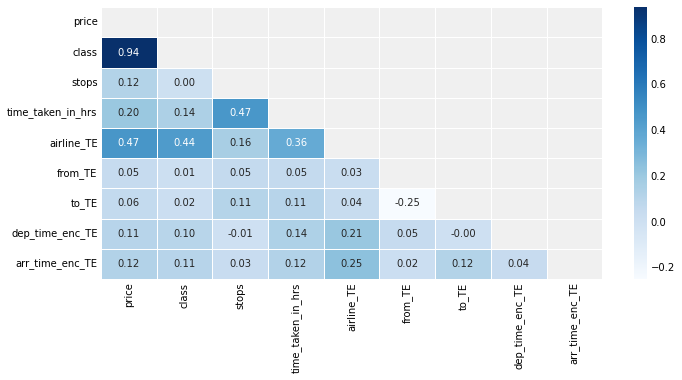

In [25]:
corr = clean_created_df_te.corr()
mp.figure(figsize=(10, 5))
sns.heatmap(corr, annot=True, fmt='.2f', linewidths=0.5, linecolor='white', mask=np.triu(corr), cmap='Blues')
mp.show()

[Normalization vs Standardization](https://www.shiksha.com/online-courses/articles/normalization-and-standardization/#:~:text=Standardization%20is%20preferred%20for%20algorithms,%2Dnearest%20neighbours%20(KNN).)

In [6]:
clean_created_df_dum = pd.read_csv("My_Clean_Dataset_DUM.csv")
clean_created_df_te = pd.read_csv("My_Clean_Dataset_TE.csv")

<div style="font-family:cambria;">

<a id="mi"></a>
### Mutual Information

Mutual Information is a measure of how much **information** you can get of one variable by observing another variable

Basically 2 features are not entirely independent, and there is some sort of dependence between them. Maybe the values of 1<sup>st</sup> variable might actually have some unexplained effect on the 2<sup>nd</sup> variable. Maybe there is some level of association/dependence between 1<sup>st</sup> and 2<sup>nd</sup> variables.

Sources:-
* [MI - Josh Starmer](https://www.youtube.com/watch?app=desktop&v=eJIp_mgVLwE)
* [MI - Medium Article](https://towardsdatascience.com/an-intuitive-view-on-mutual-information-db0655535f84)

In [4]:
def mi(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [7]:
mi(clean_created_df_dum.drop(columns='price'), clean_created_df_dum['price'])

arr_time                      2.707258
dep_time                      2.695098
time_taken_in_hrs             2.419108
class                         0.618000
airline_Vistara               0.515834
date_time                     0.477567
from_Delhi                    0.431051
from_Mumbai                   0.429823
stops                         0.392722
to_Delhi                      0.387888
to_Mumbai                     0.382328
from_Kolkata                  0.361211
from_Hyderabad                0.346984
to_Kolkata                    0.338349
from_Chennai                  0.325683
to_Hyderabad                  0.321355
to_Chennai                    0.303126
airline_Indigo                0.287622
airline_GO FIRST              0.202558
airline_AirAsia               0.165819
arr_time_enc_Evening          0.118442
dep_time_enc_Morning          0.109468
arr_time_enc_Night            0.109186
dep_time_enc_Evening          0.103881
arr_time_enc_Morning          0.095373
dep_time_enc_Early Mornin

In [8]:
make_mi_scores(clean_created_df_te.drop(columns='price'), clean_created_df_te['price'])

arr_time             2.706962
dep_time             2.694770
time_taken_in_hrs    2.418228
from_TE              1.545506
to_TE                1.430941
airline_TE           1.103337
class                0.618030
date_time            0.477868
arr_time_enc_TE      0.450541
dep_time_enc_TE      0.394384
stops                0.392954
Name: MI Scores, dtype: float64

<div style="font-family:cambria;">

This importance analysis shows us the **arrival** and **departure time**, **class** or the **flight company** like **Vistara** etc have strong non linear relationship too.

<div style="font-family:cambria;">
<a id="mt"></a>

## Model Training

In [7]:
# Define the function to calculate the MAPE - Mean Absolute Percentage Error

def MAPE (y_test, y_pred):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

In [16]:
def grid_search_cv(data, target, metrics_file_name):
    # Split data
    print("Splitting Data\n")
    x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.30, random_state=42)

    print("Scalling Data\n")
    sscaler = StandardScaler()

    x_train = sscaler.fit_transform(x_train)
    x_test = sscaler.fit_transform(x_test)

    x_train = pd.DataFrame(x_train)
    x_test = pd.DataFrame(x_test)

    # Create objects of Regression / Regressor models with default hyper-parameters
    print("Creating Model Objects\n")
    modellin = LinearRegression()
    modeldtr = DecisionTreeRegressor()
    modelbag = BaggingRegressor()
    modelrfr = RandomForestRegressor()
    modelxgr = XGBRegressor()
    modeletr = ExtraTreesRegressor()
    modelreg = Ridge()
    modellas = linear_model.Lasso(alpha=0.1)
    modelgbr = GradientBoostingRegressor()

    # Initializing all the other variables to hold the metrics and the models etc for returning at the end of the function.
    print("Initializing Model Variables")
    all_models_names = ["LinearRegression", "DecisionTreeRegressor", "BaggingRegressor", "RandomForestRegressor", "XGBRegressor", "ExtraTreesRegressor", "Ridge", "Lasso", "GradientBoostingRegressor"]
    all_models = [modellin, modeldtr, modelbag, modelrfr, modelxgr, modeletr, modelreg, modellas, modelgbr]
    model_metrics = pd.DataFrame(columns=['Model Name', 'MAE', 'Adj R^2', 'RMSE', 'MAPE', 'MSE', 'R^2'])

    print('------------------------------------------------------------------------------------------------------------')

    time_change = datetime.timedelta(minutes=330)

    for i in range(len(all_models)):
        print('Model Name: ', all_models_names[i], "\n")
        # curr_model_cv = GridSearchCV(all_models[i], all_models_params[i], cv=5)
        curr_model = all_models[i]

        # Fit it to the data
        print("Starting the Training\n")
        current_time = datet.now()
        formatted_time = (current_time + time_change).strftime('%H:%M:%S')
        print(formatted_time)

        curr_model.fit(x_train, y_train)

        # For keeping the track of time
        curr_time_2 = datet.now()
        formatted_time = (curr_time_2 + time_change).strftime('%H:%M:%S')
        print(formatted_time)
        print(curr_time_2 - current_time, "Time required for training.\n")

        # Predict the model with test data
        y_pred = curr_model.predict(x_test)

        # Print the model name
        # all_models_best_params[all_models_names[i]] = curr_model.best_params_

        # Calculate the metrics
        print("Calculating Metrics\n")
        curr_model_mae = round(metrics.mean_absolute_error(y_test, y_pred), 3)
        curr_model_mse = round(metrics.mean_squared_error(y_test, y_pred), 3)
        curr_model_rmse = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 3)
        curr_model_r2 = round(metrics.r2_score(y_test, y_pred), 3)

        # Evaluation of MAPE
        curr_model_mape = round(MAPE(y_test, y_pred), 3)

        # Calculate Adjusted R squared values
        adjusted_r2 = round(1 - (1 - curr_model_r2) * (len(y_test) - 1) / (len(y_test) - x_test.shape[1] - 1), 3)

        curr_model_data_point = {
            'Model Name' : all_models_names[i],
            'MAE' : curr_model_mae,
            'Adj R^2' : adjusted_r2,
            'RMSE' : curr_model_rmse,
            'MAPE' : curr_model_mape,
            'MSE' : curr_model_mse,
            'R^2' : curr_model_r2
        }

        # cv_model_metrics = cv_model_metrics.append(curr_model_data_point, ignore_index=True)
        s2 = pd.Series(curr_model_data_point)

        model_metrics = pd.concat([model_metrics, s2.to_frame().T], ignore_index=True)

        print("Training Complete for current model.\n")

        write_csv(metrics_file_name, model_metrics)
        print("Metrics Noted in the CSV File.\n")

        # print(curr_model_cv.best_params_)
        print('------------------------------------------------------------------------------------------------------------\n\n')
        print('------------------------------------------------------------------------------------------------------------')

    return model_metrics, all_models

[Refit Strategy - Very Important](https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html#sphx-glr-auto-examples-model-selection-plot-grid-search-digits-py)

In [25]:
x = clean_created_df_dum.drop(['price', "dep_time", "arr_time",	"date_time"], axis = 1)
y = clean_created_df_dum['price']

clean_created_df_dum_metrics, all_models_dum = grid_search_cv(x, y, "model_metrics_dum.csv")

# x = clean_created_df_te.drop(['price', "dep_time", "arr_time",	"date_time"], axis = 1)
# y = clean_created_df_te['price']

# clean_created_df_te_metrics, all_models_te = grid_search_cv(x, y, "model_metrics_te.csv")

In [20]:
clean_created_df_dum_metrics

,Model Name,MAE,Adj R^2,RMSE,MAPE,MSE,R^2
0,LinearRegression,4529.008,0.91,6811.54,43.397,46397078.752,0.91
1,DecisionTreeRegressor,1183.49,0.976,3500.41,7.779,12252867.556,0.976
2,BaggingRegressor,1116.823,0.984,2832.376,7.568,8022354.164,0.984
3,RandomForestRegressor,1091.575,0.985,2746.94,7.305,7545676.859,0.985
4,XGBRegressor,2043.99,0.976,3534.618,15.151,12493525.927,0.976
5,ExtraTreesRegressor,1184.495,0.983,2913.32,7.905,8487436.166,0.983
6,Ridge,4529.005,0.91,6811.54,43.397,46397071.026,0.91
7,Lasso,4528.907,0.91,6811.536,43.394,46397026.295,0.91
8,GradientBoostingRegressor,2966.553,0.952,4990.462,20.674,24904709.811,0.952


In [21]:
clean_created_df_te_metrics

,Model Name,MAE,Adj R^2,RMSE,MAPE,MSE,R^2
0,LinearRegression,4555.512,0.904,7029.535,41.859,49414365.248,0.904
1,DecisionTreeRegressor,1340.685,0.972,3812.452,8.367,14534788.879,0.972
2,BaggingRegressor,1262.617,0.981,3150.976,8.15,9928650.379,0.981
3,RandomForestRegressor,1228.663,0.982,3041.35,7.858,9249807.785,0.982
4,XGBRegressor,2113.769,0.973,3692.162,15.417,13632057.832,0.973
5,ExtraTreesRegressor,1358.6,0.982,3035.767,9.355,9215879.22,0.982
6,Ridge,4555.515,0.904,7029.535,41.859,49414358.84,0.904
7,Lasso,4555.471,0.904,7029.533,41.857,49414340.866,0.904
8,GradientBoostingRegressor,2928.343,0.952,4971.078,20.158,24711617.653,0.952


<div style="font-family:cambria;">

The top 3 models Adjusted R2 Score wise are:-
* RandomForestRegressor
* BaggingRegressor
* ExtraTreesRegressor

We will go ahead with RandomForestRegressor model.

In [27]:
rfr_model = all_models_dum[3]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)
rfr_model.fit(x_train, y_train)
y_pred = rfr_model.predict(x_test)

curr_model_mae = round(metrics.mean_absolute_error(y_test, y_pred), 3)
curr_model_mse = round(metrics.mean_squared_error(y_test, y_pred), 3)
curr_model_rmse = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 3)
curr_model_r2 = round(metrics.r2_score(y_test, y_pred), 3)
curr_model_mape = round(MAPE(y_test, y_pred), 3)
adjusted_r2 = round(1 - (1 - curr_model_r2) * (len(y_test) - 1) / (len(y_test) - x_test.shape[1] - 1), 3)

print('MAE - ', curr_model_mae)
print('Adj R^2 - ', adjusted_r2)
print('RMSE - ', curr_model_rmse)
print('MAPE - ', curr_model_mape)
print('MSE - ', curr_model_mse)
print('R^2 - ', curr_model_r2)

MAE -  1081.287
Adj R^2 -  0.985
RMSE -  2741.492
MAPE -  7.246
MSE -  7515777.923
R^2 -  0.985


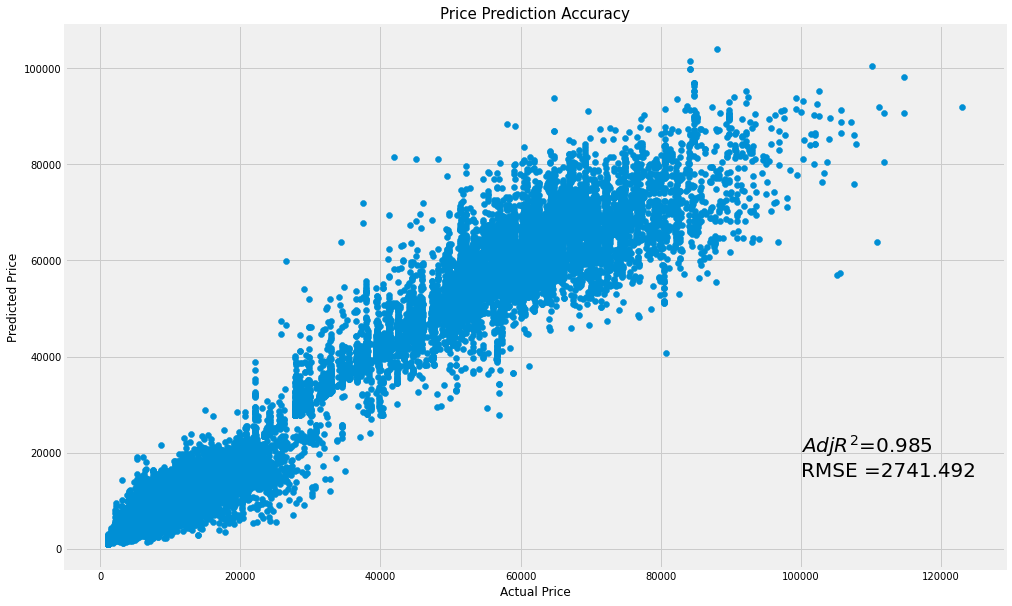

In [32]:
fig,ax = mp.subplots(figsize=(15, 10))
ax.set_title("Price Prediction Accuracy", fontsize = 15)
ax.set_ylabel('Predicted Price',fontsize=12)
ax.set_xlabel('Actual Price',fontsize=12)
ax.scatter(y_test, y_pred)

mp.text(100000, 20000,'$ Adj R^{2} $=' + str(adjusted_r2),fontsize=20)
mp.text(100000, 15000,'RMSE =' + str(curr_model_rmse),fontsize=20)
mp.show()

In [34]:
with open("rfr_model.pkl", "wb") as f:
    dump(rfr_model, f, protocol=5)

In [36]:
with open("rfr_model.pkl", "rb") as f:
    clf = load(f)

In [37]:
y_pred = clf.predict(x_test)

curr_model_mae = round(metrics.mean_absolute_error(y_test, y_pred), 3)
curr_model_mse = round(metrics.mean_squared_error(y_test, y_pred), 3)
curr_model_rmse = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 3)
curr_model_r2 = round(metrics.r2_score(y_test, y_pred), 3)
curr_model_mape = round(MAPE(y_test, y_pred), 3)
adjusted_r2 = round(1 - (1 - curr_model_r2) * (len(y_test) - 1) / (len(y_test) - x_test.shape[1] - 1), 3)

print('MAE - ', curr_model_mae)
print('Adj R^2 - ', adjusted_r2)
print('RMSE - ', curr_model_rmse)
print('MAPE - ', curr_model_mape)
print('MSE - ', curr_model_mse)
print('R^2 - ', curr_model_r2)

MAE -  1081.287
Adj R^2 -  0.985
RMSE -  2741.492
MAPE -  7.246
MSE -  7515777.923
R^2 -  0.985


<div style="font-family:cambria;">

The final Adjusted R<sup>2</sup> Score of the Random Forest Regressor model is 0.985.

<div style="font-family:cambria;">
<a id="fp"></a>

## Final Points

<div style="font-family:cambria;">

* The model that gives the best result is the **RandomForestRegressor** with on the test dataset an R<sup>2</sup> score equals to **0.982** and a **MAE** score equals to **1229**.

* There is a big gap between flight tickets in Business and economy. In average business tickets are roughly **8** times more expensive than economy tickets.

* **Vistara** and **AirIndia** seems to be the most expensive companies and **AirAsia** the cheapest. However for business tickets, only **Vistara** and **AirIndia** are available, and **Vistara** is slightly more expensive.

* **Vistara** airlines are highest used followed by **Air India**. They are the most expensive airline companies in the same order and **AirAsia** and **Trujet** are the cheapest. However only **Vistara** and **Air India** provide business class tickets.

* Until **20 days** before the flight the prices grow quite gradually. But one day before the flight, there usually are empty seats that have not been sold. Thus it is possible to find tickets three times cheaper than the day before.

* The general trend is that longer the flight, higher the price. But the break up of this trend is:-
	* The prices rise sharply from 5 to around 7-8 hours of flight.
    * After that the average prices pretty much remains consistent till about 20 hours.
    * Then there is a slight increase till 30 hours.

* For the time of the flight:-
	* The **Departure** during the **Ungodly Hour** and **Late Night** are cheapest, and **Night** times are more expensive.
    * The **Arrival** during the **Evening** and **Morning** are most expensive, **UnGodly Hour** and **Late Night** are cheapest.

* For the **Source** and **Destination** of the trip:-
	* Flights from **Delhi** are the cheapest and the ones from **Kolkata** are espensive. **Chenai** and **Mumbai** seem to be some what similar with airline prices.
    * Flight to **Delhi** are the cheapest and to **Kolkata** the most expensive ones. Flights to **Mumbai** and **Banglore** are somewhat similar in price range.

* In general, prices increase as the number of stops increase. Most of the flights prefer having only **1** stop.

<div style="font-family:cambria;">

<a id="tilpif"></a>
## Things I learnt and Problems I faced

<div style="font-family:cambria;">

### Grid Search CV:-
* Initially I had planned to perform a Grid Search CV on the entire dataset with all the models I used. But it was taking far too long to train just the Decision Tree Models.
* After several attempts at changing the parameter size (since I thought that reducing the number of models to train) of all the models I was still not able to train all the models. It was taking around 6 hours to train just 1 set of models and still the training wasn't complete.
* And this was all on colab. I had also tried using the GPU instances but for some reason could not use them, it kept showing the notification of GPUs not in use.
* Finally I realised that the issue is the size of the data. In my previous project I was succesfully able to use Grid Search CV because the dataset was smaller in size (around 2k rows).
* Finally I had to resort to not using Grid Search CV anymore and simply stick to the default parameters. Although in this case even default models gave a good performance.
* If anyone has any ideas on:-
    * How to perform Grid Search CV on huge datasets??
    * How to make use of the GPU instances on colab for machine learning models??

  Your help will be very much appreciated.


### Mutual Information:-
* I got to learn about Mutual Information for understanding which variables are more important for the target prediction.
* More info about that [here](###mi).

<div style="color:black;
            display:fill;
            border-radius:15px;
            background-color:pink;
            font-size:100%;
            font-family:cambria;">
    <div style='padding: 20px;
                font-size:18px;
              color:black;
              text-align:right;'>
        <b>Analysis performed by - Deep Doshi.<b>
            <br>
        <b>Last updated on - 20/07/2024<b>
    </div>

</div>